# Исследование для маркетингого отдела

Даны данные  с июня 2017 по конец мая 2018 года: 

-	лог сервера с данными о посещениях сайта 
-	выгрузка всех заказов за этот период
-	статистика рекламных расходов.

Задача: оптимизировать маркетинговые затраты.

Для ее решения изучим:

-	как люди пользуются продуктом,
-	когда они начинают покупать,
-	сколько денег приносит каждый клиент
-	когда клиент окупается

    
Заказчик: маркетинговый отдел 

# Изучение общей информации 

Изучим данные из таблицы visits (лог сервера с информацией о посещениях сайта). Для этого выведем на экран 10 первых(последних) строк таблицы:

In [1]:
import pandas as pd
visits = pd.read_csv('/datasets/visits_log.csv')
#visits.head(10)
visits.tail(10)

,Device,End Ts,Source Id,Start Ts,Uid
359390,desktop,2017-12-11 17:54:19,1,2017-12-11 17:54:00,18268369011883553090
359391,touch,2017-08-30 11:53:19,2,2017-08-30 11:53:00,18304232853749481866
359392,desktop,2017-12-30 21:49:19,4,2017-12-30 21:49:00,18311497973035795342
359393,desktop,2017-06-08 07:49:19,4,2017-06-08 07:49:00,18325675073358289850
359394,touch,2017-11-06 08:00:19,4,2017-11-06 08:00:00,18332905065174083046
359395,desktop,2017-07-29 19:07:19,2,2017-07-29 19:07:00,18363291481961487539
359396,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586
359397,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,18387297585500748294
359398,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624776485
359399,touch,2017-09-10 13:13:19,2,2017-09-10 13:13:00,18396128934054549559


Посмотрим на общую информацию о файле:

In [2]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
Device       359400 non-null object
End Ts       359400 non-null object
Source Id    359400 non-null int64
Start Ts     359400 non-null object
Uid          359400 non-null uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


Описание данных в таблице visits (лог сервера с информацией о посещениях сайта):

- Uid — уникальный идентификатор пользователя
- Device — категория устройства пользователя
- Start Ts — дата и время начала сессии
- End Ts — дата и время окончания сессии
- Source Id — идентификатор рекламного источника, из которого пришел пользователь


*Таблица visits (лог сервера с информацией о посещениях сайта) состоит из 359400 строк и 5 столбцов. Столбцы 'Start Ts', 'End Ts' содержат даты. 'Device' - категориальную переменную. Остальные - количественную.*

*Нужна замена типа данных в столбцах 'Start Ts', 'End Ts' на формат даты. Пропусков нет. Нужны преобразования в названиях столбцов (убрать пробелы между слов в названиях, привести к нижнему регистру) для удобства работы с ними.*

Переходим к изучению данных в таблице orders (информация о заказах):

In [3]:
# Загрузим файл:
orders = pd.read_csv('/datasets/orders_log.csv')
orders.head(10)

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450
5,2017-06-01 08:43:00,0.18,10402394430196413321
6,2017-06-01 08:54:00,1.83,12464626743129688638
7,2017-06-01 09:22:00,1.22,3644482766749211722
8,2017-06-01 09:22:00,3.30,17542070709969841479
9,2017-06-01 09:23:00,0.37,1074355127080856382


Выведем на экран общую информацию о полученном файле:

In [4]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
Buy Ts     50415 non-null object
Revenue    50415 non-null float64
Uid        50415 non-null uint64
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


Описание данных в таблице orders (информация о заказах):

-	Uid — уникальный id пользователя, который сделал заказ
-	Buy Ts — дата и время заказа
-	Revenue — выручка с этого заказа


*Таблица orders (информация о заказах) состоит из 50415 строк и 3 столбцов. Столбец 'Buy Ts' содержит дату; остальные - количественную переменную*

*Нужна замена типа данных в столбце 'Buy Ts' на формат даты. Пропусков нет. Нужно выполнить преобразования в названиях столбцов*

Переходим к таблице costs (информация о затратах на маркетинг):

In [5]:
# Загрузим файл:
costs  = pd.read_csv('/datasets/costs.csv')
costs.head(10) # Выведем на экран первые 10 строк 

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08
5,1,2017-06-06,40.39
6,1,2017-06-07,40.59
7,1,2017-06-08,56.63
8,1,2017-06-09,40.16
9,1,2017-06-10,43.24


Получим общую информацию о файле:

In [6]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null object
costs        2542 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


Описание данных в таблице costs (информация о затратах на маркетинг):

-	source_id — идентификатор рекламного источника
-	dt — дата
-	costs — затраты на этот рекламный источник в этот день


*Таблица costs (информация о затратах на маркетинг) состоит из 2542 строк и 3 столбцов, два ('source_id', 'costs') из которых содержат количественную переменную, 'dt' - формат даты*

*Пропусков нет. В столбце 'dt' нужно выполнить замену типа данных на формат даты.*

### Вывод:

Перед нами три таблицы: visits (лог сервера с информацией о посещениях сайта), orders (информация о заказах), costs (информация о затратах на маркетинг).

Каждая строка таблицы visits содержит информацию об одной интернет-сессии, которая была выполнена пользователем. Содержится уникальный идентификатор пользователя, дата и время начала и окончания интернет-сессии. А также категорию устройства пользователя: 'touch', 'desktop'; идентификатор рекламного источника, из которого пришел пользователь (4,  2,  5,  9,  3,  1, 10,  7,  6).

Каждая строка таблицы orders содержит информацию об одном заказе, который совершил пользователь(уникальный id - номер) в определенную дату и время. А также сумму выручки  с этого заказа.

Каждая строка таблицы costs содержит информацию о сумме затрат на рекламный источник в конкретную дату.

Переходим к предобработке данных.

# Предобработка данных.

1) Преобразуем названия столбцов в таблицах visits, orders: приведем к нижнему регистру и заменим пробелы между словами на '_'. 
2) Выполним замену типа данных в нужных столбцах на формат даты для того, чтобы в дальнейшем была возможность работать с ними.

Приступим:

1) Преобразования в названиях столбцов будем выполнять с помощью методов split() и lower():

In [7]:
# В таблице visits:
visits.columns = ["_".join (x) for x in visits.columns.str.split()] # заменяем пробел между словами на "_"
visits.columns = visits.columns.str.lower() # приводим к нижнему регистру
# В таблице orders:
orders.columns = ["_".join (x) for x in orders.columns.str.split()]# заменяем пробел между словами на "_"
orders.columns = orders.columns.str.lower()# приводим к нижнему регистру

Проверим корректность преобразований:

In [8]:
# В таблице visits:
visits.columns


Index(['device', 'end_ts', 'source_id', 'start_ts', 'uid'], dtype='object')

In [9]:
# В таблице orders:
orders.columns

Index(['buy_ts', 'revenue', 'uid'], dtype='object')

Итак, преобразования выполнены корректно. 





2) Совершим замену типа данных на формат даты в нужных столбцах c помощью метода to_datetime():

In [10]:
# В таблице visits:
visits['end_ts'] = pd.to_datetime(visits['end_ts'], format = '%Y-%m-%d %H:%M:%S')
visits['start_ts'] = pd.to_datetime(visits['start_ts'], format = '%Y-%m-%d %H:%M:%S')
# Проверим замену:
visits.dtypes

device               object
end_ts       datetime64[ns]
source_id             int64
start_ts     datetime64[ns]
uid                  uint64
dtype: object

В таблице visits замена выполнена корректно. Переходим к таблице orders:

In [11]:
orders['buy_ts'] = pd.to_datetime(orders['buy_ts'], format = '%Y-%m-%d %H:%M:%S')
# Проверим замену:
orders.dtypes

buy_ts     datetime64[ns]
revenue           float64
uid                uint64
dtype: object

Готово. И у нас осталось выполнить замену в таблице costs:

In [12]:
costs['date_cost_marketing'] = pd.to_datetime(costs['dt'], format = '%Y-%m-%d')
# Проверим замену:
orders.dtypes

buy_ts     datetime64[ns]
revenue           float64
uid                uint64
dtype: object

### Вывод:

Предобработка данных в столбцах полученных таблиц выполнена. Благодаря совершенным действиям, сможем проводить различные операции с датами, удобно будет работать с названиями столбцов, т.к. они все приведены к одному виду.

Можем переходить к расчетам, к построению отчетов и графиков.

# Исследовательский анализ

*Изучим пользовательскую активность.* Для этого ответим на вопросы:

1)	Сколько людей пользуются веб-приложением в день, неделю, месяц?

2)	Сколько интернет-сессий в день?

3)	Сколько длится одна интернет-сессия?

4)	Как часто люди возвращаются?

Обратимся к таблице visits (лог сервера с информацией о посещениях сайта). В ней хранится информация об id-пользователях, дата и время начала и окончания сессии, из какого рекламного источника пришел пользователь и указана категория устройства. Данные взяты с июня 2017 по конец мая 2018 года. 

Для ответа на первый вопрос нужно рассчитать следующие показатели: DAU - количество уникальных пользователей в день, WAU - в неделю, MAU - в месяц. А также вычислим метрику sticky factor = (DAU / WAU) * 100 и sticky factor = (DAU / MAU) * 100, с помощью которой мы узнаем как часто пользователи обращаются к приложению. Также выясним как метрики отличаются по устройствам, по рекламным источникам. Построим графики. Приступим.

Чтобы посчитать недельное, месячное и за день использование (DAU, WAU, MAU), выделим в отдельные столбцы год, месяц, неделю, а также полную дату и название дня недели из данных столбца 'start_ts' - начало интернет-сессии:

In [13]:
# Воспользуемся методами dt.year, dt.week, dt.month, dt.date, dt.weekday_name и dt.weekday:
# Выделим год:
visits['visits_year'] = visits['start_ts'].dt.year
# Выделим месяц:
visits['visits_month'] = visits['start_ts'].dt.month
# Выделим неделю:
visits['visits_week'] = visits['start_ts'].dt.week
# Выделим полную дату:
visits['visits_date'] = visits['start_ts'].dt.date
# Выделим название дня недели и номера дня недели:
visits['visits_weekday_name'] = visits['start_ts'].dt.weekday_name
visits['visits_weekday'] = visits['start_ts'].dt.weekday
# проверим результат: выведем первые 5 строк таблицы:
visits.head(5)

,device,end_ts,source_id,start_ts,uid,visits_year,visits_month,visits_week,visits_date,visits_weekday_name,visits_weekday
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,2017-12-20,Wednesday,2
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,2018-02-19,Monday,0
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,7,26,2017-07-01,Saturday,5
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,2018-05-20,Sunday,6
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,12,52,2017-12-27,Wednesday,2


Посчитаем метрики. Для этого создадим функцию count_visits:

In [14]:
def count_visits(data):
# dau: группируем данные по столбцу 'visits_date' - находим количество уник.id - находим среднее:
# округляем результат с помощью метода round()
    data_dau = round(data.groupby('visits_date').agg({'uid': 'nunique'}).mean())
# mau: группируем данные по году, месяцу - находим количество уник.id - находим среднее:
    data_mau = round(data.groupby(['visits_year', 'visits_month']).agg({'uid': 'nunique'}).mean())
# wau: группируем данные по году, номеру недели - находим количество уник.id - находим среднее:
    data_wau = round(data.groupby(['visits_year', 'visits_week']).agg({'uid': 'nunique'}).mean())
    sticky_factor_dau_wau = (data_dau / data_wau) * 100
    sticky_factor_dau_mau = data_dau / data_mau * 100
    print('DAU - количество уникальных пользователей в день {}'.format(data_dau))
    print('WAU - количество уникальных пользователей в неделю {}'.format(data_wau))
    print('MAU - количество уникальных пользователей в месяц {}'.format(data_mau))
    print('sticky_factor (dau / wau): {}'.format(round(sticky_factor_dau_wau)))
    print('sticky_factor (dau / mau): {}'.format(round(sticky_factor_dau_mau)))

Функция count_visits создана. Сейчас вычислим среднее количество уникальных пользователей в день, в неделю, месяц за период с июня 2017 по конец мая 2018 года.  

In [15]:
# в качестве аргумента в функцию передадим датафрейм visits:
count_visits(visits)

DAU - количество уникальных пользователей в день uid    908.0
dtype: float64
WAU - количество уникальных пользователей в неделю uid    5716.0
dtype: float64
MAU - количество уникальных пользователей в месяц uid    23228.0
dtype: float64
sticky_factor (dau / wau): uid    16.0
dtype: float64
sticky_factor (dau / mau): uid    4.0
dtype: float64


**Итак, за период с июня 2017 по конец мая 2018гг.:в день "посещало"  веб-приложение ~908 уникальных пользователей, в неделю ~ 5716, в месяц ~23228. Коэффициент вовлеченности: за неделю (dau / wau): ~16%, в месяц (dau / mau) ~4%. Т.е. регулярно посещает веб-приложение в месяц ~4% уникальных пользователей.**


Вычислим метрики DAU, WAU, MAU для каждого устройства: desktop, touch. Для этого создадим две таблицы 

In [16]:
# Отфильтруем строки таблицы по устройствам. Результат сохраним в отдельные таблицы:
touch_visits = visits.query('device == "touch"').copy()
desktop_visits = visits.query('device == "desktop"').copy()
# Найдем метрики с помощью функции count_visits
count_visits(touch_visits)

DAU - количество уникальных пользователей в день uid    253.0
dtype: float64
WAU - количество уникальных пользователей в неделю uid    1635.0
dtype: float64
MAU - количество уникальных пользователей в месяц uid    6826.0
dtype: float64
sticky_factor (dau / wau): uid    15.0
dtype: float64
sticky_factor (dau / mau): uid    4.0
dtype: float64


In [17]:
# Найдем метрики с помощью функции count_visits
count_visits(desktop_visits)

DAU - количество уникальных пользователей в день uid    659.0
dtype: float64
WAU - количество уникальных пользователей в неделю uid    4130.0
dtype: float64
MAU - количество уникальных пользователей в месяц uid    16725.0
dtype: float64
sticky_factor (dau / wau): uid    16.0
dtype: float64
sticky_factor (dau / mau): uid    4.0
dtype: float64


**Итак, за период с июня 2017 по конец мая 2018гг. с устройства "touch" веб-приложение посещало: в день ~253, в неделю: ~1635, в месяц: 6826 уникальных пользователей. Регулярно посещают в месяц ~4% пользователей, в неделю ~ 15%.**

**С устройства "desktop" веб-приложение посещало: в день ~659, в неделю: ~4130, в месяц: 16725 уникальных пользователей. Регулярно посещают в месяц ~4% пользователей, в неделю ~ 16%.**


Посмотрим как на графике меняется dau за весь период: общий, с разбивкой по платформам, с разбивкой на рекламные источники и взависимости от дня недели:

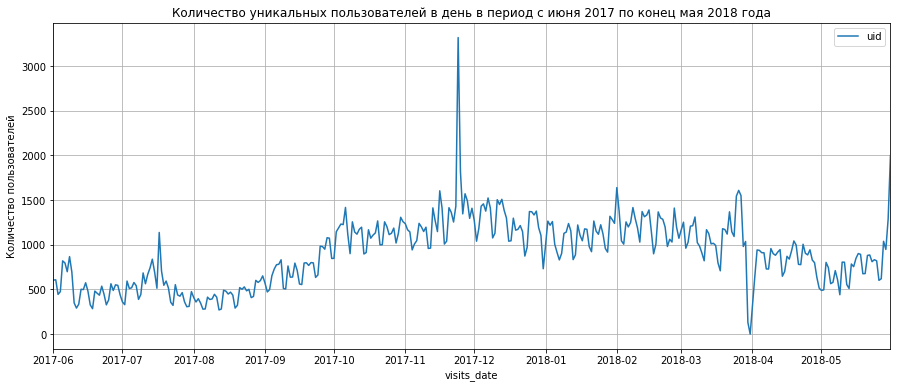

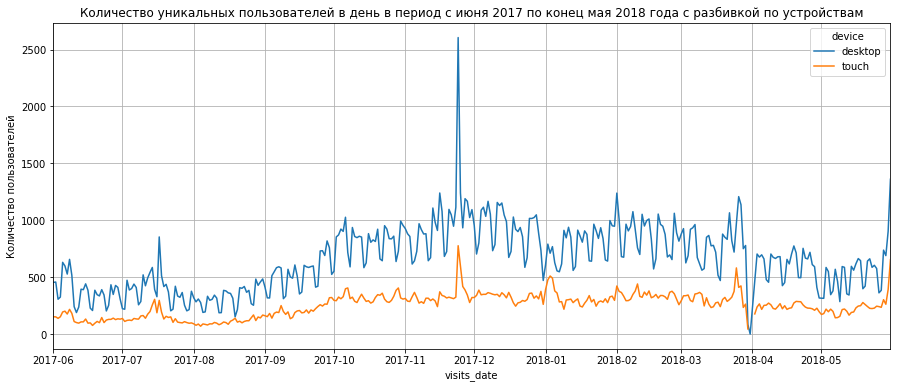

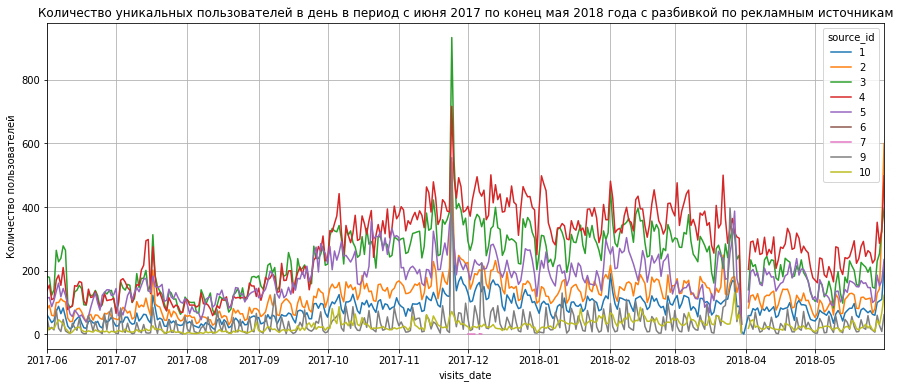

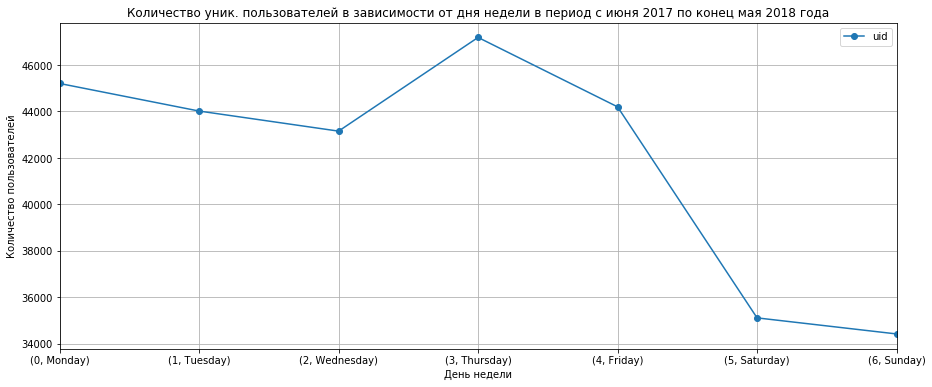

In [18]:
# Общий dau: 
import matplotlib.pyplot as plt
visits.groupby('visits_date').agg({'uid': 'nunique'}).plot(figsize = (15, 6),
                    title = 'Количество уникальных пользователей в день в период с июня 2017 по конец мая 2018 года'
                                                          )
plt.ylabel('Количество пользователей')
plt.grid()
visits.groupby(['visits_date', 'device']).agg({'uid': 'nunique'}).pivot_table(index = 'visits_date',
                                                                             columns = 'device',
                                                                             values = 'uid').plot(figsize = (15, 6))
plt.grid()
plt.title('Количество уникальных пользователей в день в период с июня 2017 по конец мая 2018 года \
с разбивкой по устройствам')
plt.ylabel('Количество пользователей')

visits.groupby(['visits_date', 'source_id']).agg({'uid': 'nunique'}).pivot_table(index = 'visits_date',
                                                                             columns = 'source_id',
                                                                             values = 'uid').plot(figsize = (15, 6))
plt.grid()
plt.title('Количество уникальных пользователей в день в период с июня 2017 по конец мая 2018 года \
с разбивкой по рекламным источникам')
plt.ylabel('Количество пользователей')
plt.show()

visits.groupby(['visits_weekday', 'visits_weekday_name']).agg({'uid': 'nunique'}).plot(figsize = (15, 6), style = 'o-')
plt.title('Количество уник. пользователей в зависимости от дня недели в период с июня 2017 по конец мая 2018 года')
plt.xlabel('День недели')
plt.grid()
plt.ylabel('Количество пользователей')
plt.show()



Посмотрим как на графике меняется wau за весь период: общий, с разбивкой по платформам, с разбивкой на рекламные источники:

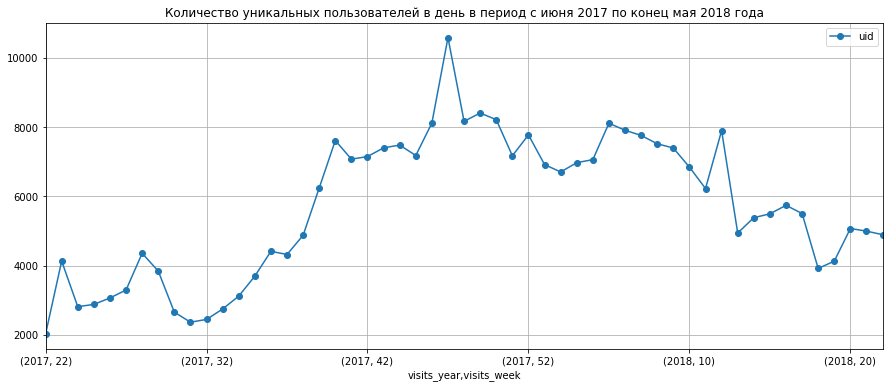

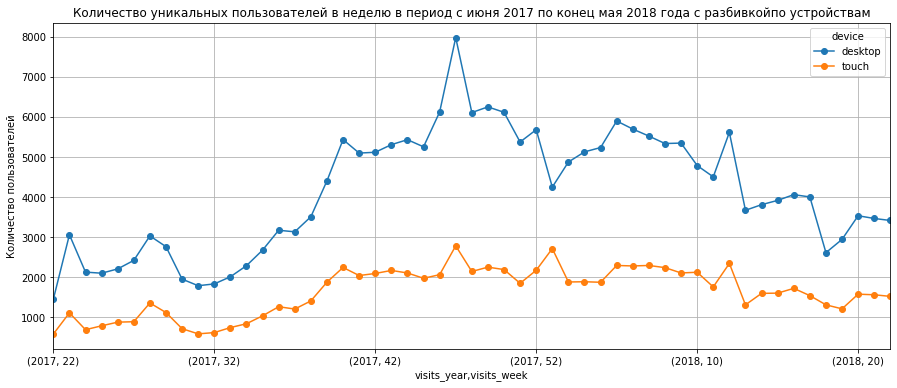

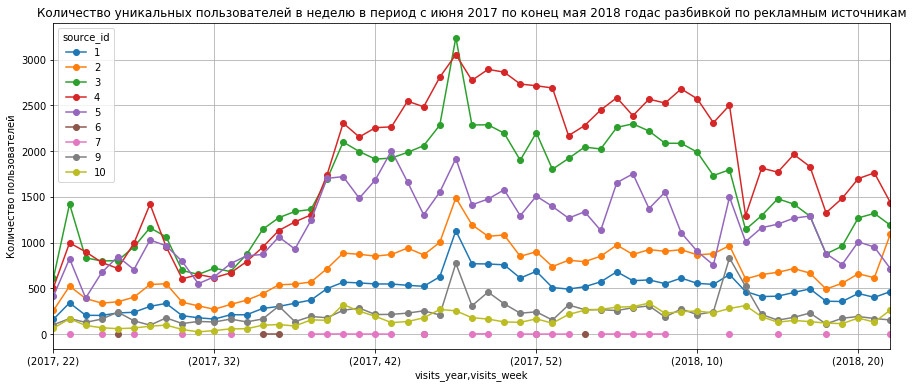

In [19]:
visits.groupby(['visits_year', 'visits_week']).agg({'uid': 'nunique'}).plot(figsize = (15, 6), style = 'o-',
                    title = 'Количество уникальных пользователей в день в период с июня 2017 по конец мая 2018 года')
plt.grid()


visits.groupby(['visits_year', 'visits_week','device']).agg({'uid': 'nunique'}).pivot_table(
                                                                             index = ['visits_year', 'visits_week'],
                                                                             columns = 'device',
                                                                             values = 'uid').plot(figsize = (15, 6),
                                                                                                 style = 'o-')
plt.grid()
plt.title('Количество уникальных пользователей в неделю в период с июня 2017 по конец мая 2018 года с разбивкой\
по устройствам')
plt.ylabel('Количество пользователей')

visits.groupby(['visits_year', 'visits_week', 'source_id']).agg({'uid': 'nunique'}).pivot_table(
                                                                             index = ['visits_year', 'visits_week'],
                                                                             columns = 'source_id',
                                                                             values = 'uid').plot(figsize = (15, 6),
                                                                                                 style = 'o-')
plt.title('Количество уникальных пользователей в неделю в период с июня 2017 по конец мая 2018 года\
с разбивкой по рекламным источникам')
plt.grid()
plt.ylabel('Количество пользователей')
plt.show()

Сейчас посмотрим как на графике меняется mau за весь период: общий, с разбивкой по платформам, с разбивкой на рекламные источники:

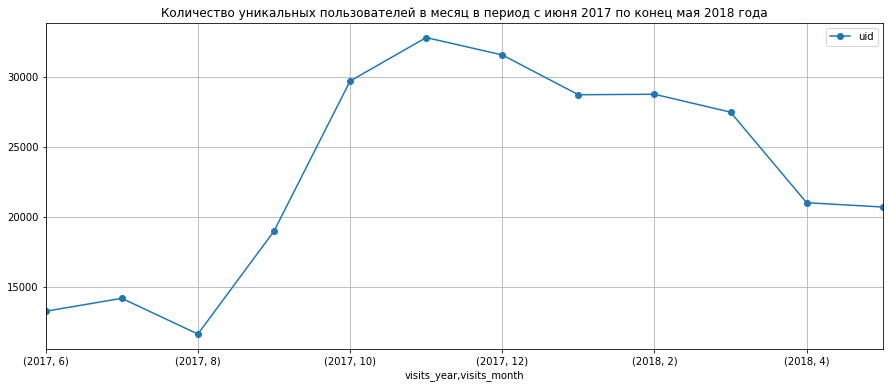

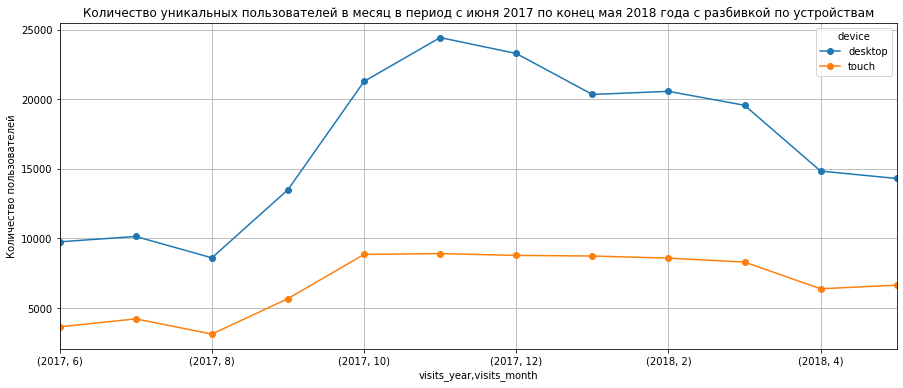

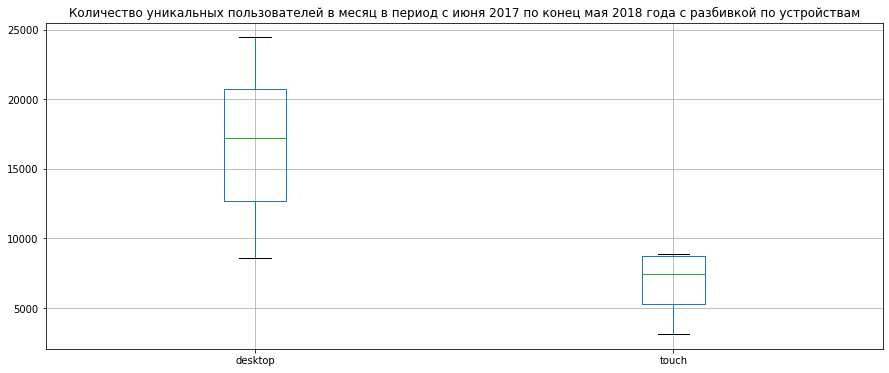

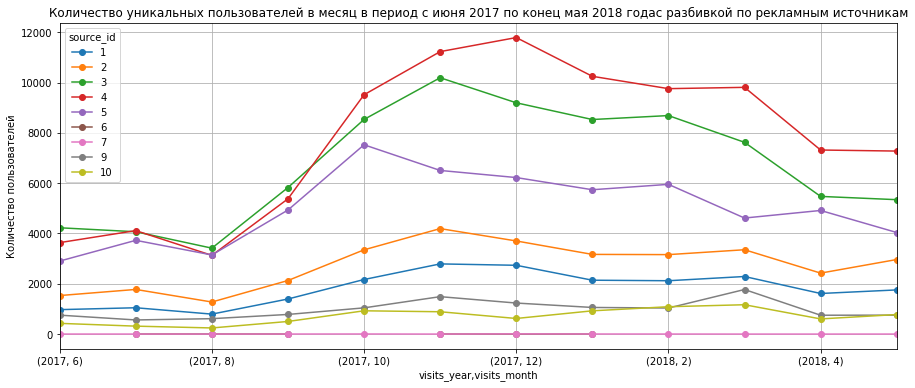

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


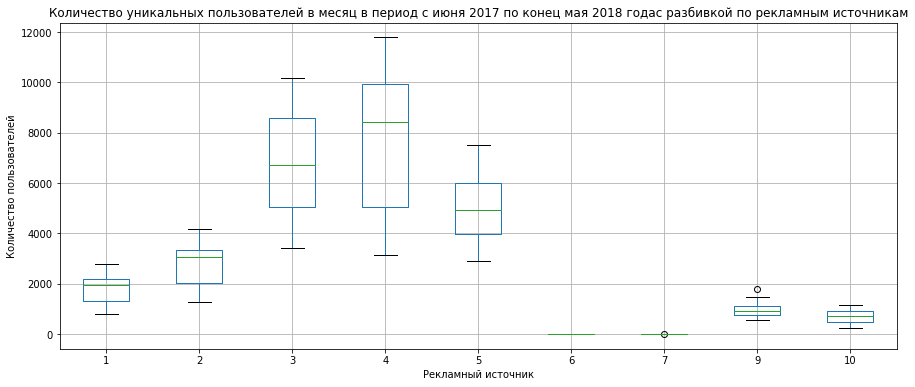

In [20]:
visits.groupby(['visits_year', 'visits_month']).agg({'uid': 'nunique'}).plot(figsize = (15, 6),style = 'o-')
plt.title('Количество уникальных пользователей в месяц в период с июня 2017 по конец мая 2018 года')
plt.grid()


visits.groupby(['visits_year', 'visits_month','device']).agg({'uid': 'nunique'}).pivot_table(
                                                                             index = ['visits_year', 'visits_month'],
                                                                             columns = 'device',
                                                                             values = 'uid').plot(figsize = (15, 6),
                                                                                                 style = 'o-')
plt.title('Количество уникальных пользователей в месяц в период с июня 2017 по конец мая 2018 года \
с разбивкой по устройствам')
plt.grid()
plt.ylabel('Количество пользователей')
plt.show()

visits.groupby(['visits_year', 'visits_month','device']).agg({'uid': 'nunique'}).pivot_table(
                                                                             index = ['visits_year', 'visits_month'],
                                                                             columns = 'device',
                                                                             values = 'uid').boxplot(figsize = (15, 6)
                                                                                                 )

plt.title('Количество уникальных пользователей в месяц в период с июня 2017 по конец мая 2018 года \
с разбивкой по устройствам')
plt.show()
visits.groupby(['visits_year', 'visits_month', 'source_id']).agg({'uid': 'nunique'}).pivot_table(
                                                                             index = ['visits_year', 'visits_month'],
                                                                             columns = 'source_id',
                                                                             values = 'uid').plot(figsize = (15, 6),
                                                                                                 style = 'o-')
plt.grid()
plt.title('Количество уникальных пользователей в месяц в период с июня 2017 по конец мая 2018 года\
с разбивкой по рекламным источникам')
plt.ylabel('Количество пользователей')
plt.show()

visits.groupby(['visits_year', 'visits_month', 'source_id']).agg({'uid': 'nunique'}).pivot_table(
                                                                             index = ['visits_year', 'visits_month'],
                                                                             columns = 'source_id',
                                                                             values = 'uid').boxplot(figsize = (15, 6))
plt.title('Количество уникальных пользователей в месяц в период с июня 2017 по конец мая 2018 года\
с разбивкой по рекламным источникам')
plt.xlabel('Рекламный источник')
plt.ylabel('Количество пользователей')
plt.show()

**Видим, что количество уникальных пользователей начинает возрастать с августа месяца и достигает пика в ноябре, в январе наблюдается незначительный спад до марта месяца. И с марта по август количество уникальных пользователей резко уменьшается.**

**Данное явление наблюдается и на графиках с разбивкой данных по устройствам, по рекламным источникам.**

**Скорее всего, спад в летние месяцы объясняется тем, что начинается сезон отпусков, дач у пользователей, начинаются каникулы в театрах и других заведениях. К осени люди возвращаются, организации начинают работать в обычном режиме.**

**Также на количество пользователей влияют новогодние праздники, каникулы (оно увеличивается)**

**Количество уникальных пользователей в зависимости от дня недели: начинает возрастать в понедельник, к четвергу достигает пика и с пятницы резко падает. Скорее всего, пользователи в будни планируют свои досуг на выходные - этим объяснятся увеличение и уменьшение**

**Количество уникальных пользователей с разбивкой по устройствам: есть предположение, что среднее количество, зашедших в веб-приложение с устройства desktop выше среднего количества,зашедших с устройства "touch"**

**По поводу количества уникальных пользователей с группировкой данных по рекламным источникам: есть предположение, что среднее количество, пришедших из источников: №4, 3, 5 превышает среднее количество, пришедших из других источников.**


*Сейчас выясним сколько сессий в день приходится на одного пользователя?*

Воспользуемся формулой: Число сессий  = число сессий в день/ на количество пользователей в день.

Создадим таблицу session_day: сгруппировав данные таблицы visits по столбцу 'visits_date', найдем кол-во сессий и кол-во уникальных пользователей:

In [21]:
session_day = visits.groupby('visits_date').agg({'uid': ['count', 'nunique']})
# Превратим мультииндекс в более простой массив:
session_day.columns = ["_".join(x) for x in session_day.columns.ravel()]
# Найдем число сессий на одного пользователя по формуле:
session_day['session_per_user'] = round(session_day['uid_count'] / session_day['uid_nunique'])
session_day

,uid_count,uid_nunique,session_per_user
visits_date,,,
2017-06-01,664,605,1.0
2017-06-02,658,608,1.0
2017-06-03,477,445,1.0
2017-06-04,510,476,1.0
2017-06-05,893,820,1.0
...,...,...,...
2018-05-27,672,620,1.0
2018-05-28,1156,1039,1.0
2018-05-29,1035,948,1.0


Найдем среднее:

In [22]:
session_day['session_per_user'].mean()

1.0

**В итоге получили что на одного пользователя в среднем приходится одна интернет-сессия в день**

*Ответим на вопрос: сколько длится одна сессия?*

Вычислим среднюю продолжительность сессии (Average Session Length): посчитаем длину всех сессий и раздедим на общее количество сессий за период:

In [23]:
# Посчитаем разность между началом сессии и окончанием. Результат выведем в секундах:
import numpy as np
visits['session_sec'] = (visits['end_ts'] - visits['start_ts'])  / np.timedelta64(1, 's')
visits.head(5)

,device,end_ts,source_id,start_ts,uid,visits_year,visits_month,visits_week,visits_date,visits_weekday_name,visits_weekday,session_sec
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,2017-12-20,Wednesday,2,1080.0
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,2018-02-19,Monday,0,1680.0
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,7,26,2017-07-01,Saturday,5,0.0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,2018-05-20,Sunday,6,1440.0
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,12,52,2017-12-27,Wednesday,2,0.0


Создадим таблицу session: сгруппируем таблицу visits по дате и вычислим длину всех сессий и количество:

In [24]:
# Создаем таблицу:
session = visits.groupby('visits_date').agg({'session_sec': ['sum','count']})
session.columns = ["_".join(x) for x in session.columns.ravel()] # превращение мультииндекса в более простой массив
# Вычисляем значение asl для каждой даты. Результат округляем с помощью метода round()
session['visits_asl'] = round(session['session_sec_sum'] / session['session_sec_count'])
session.tail(5) # проверка результата

,session_sec_sum,session_sec_count,visits_asl
visits_date,,,
2018-05-27,374280.0,672,557.0
2018-05-28,731539.0,1156,633.0
2018-05-29,651458.0,1035,629.0
2018-05-30,903398.0,1410,641.0
2018-05-31,1668882.0,2256,740.0


Посмотрим на распределение данных в столбце 'visits_asl' - построим гистограмму и "ящик с усами":

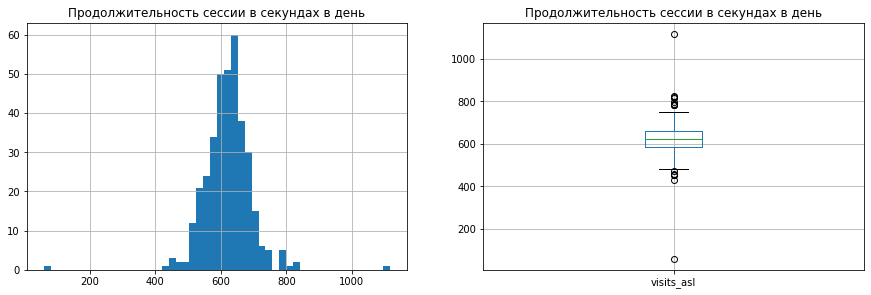

In [25]:
plt.figure(figsize = (15,10))
session['visits_asl'].hist(bins = 50, ax = plt.subplot(2,2,1))
plt.title('Продолжительность сессии в секундах в день')
session.boxplot('visits_asl', ax = plt.subplot(2,2,2))
plt.title('Продолжительность сессии в секундах в день')
plt.show()

In [26]:
session['visits_asl'].median()

622.0

**В итоге получили, что для 50% пользователей продолжительность сессий составляет не больше 622сек. в день или ~ 10 мин., для остальных 50% не меньше 622 сек. в день.**

Рассчитаем этот показатель для данных в разрезе на "категория устройства пользователя". Сгруппируем таблицу visits по столбцам 'device', 'visits_date':

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


<Figure size 432x288 with 0 Axes>

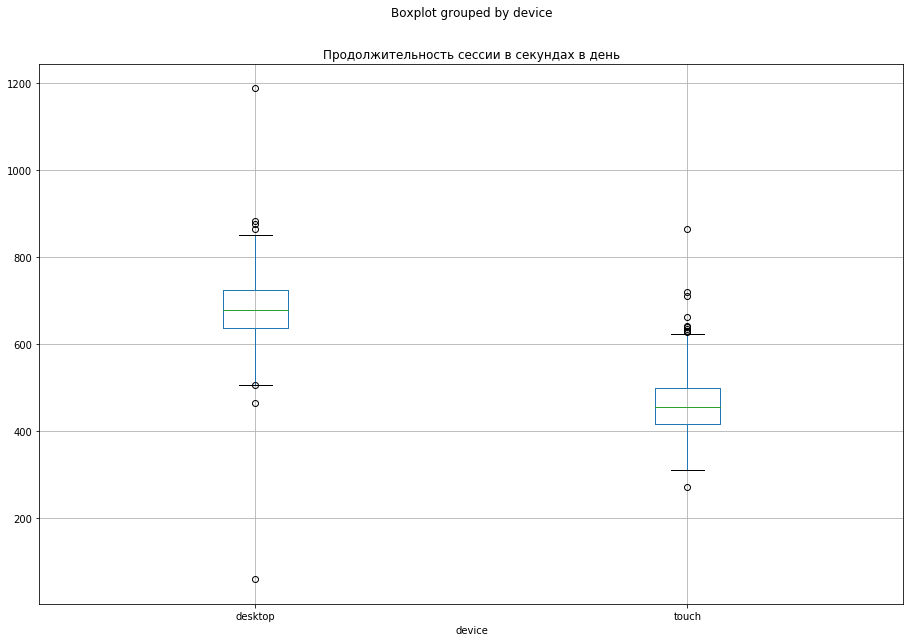

In [27]:
# Создаем таблицу:
session_1 = visits.groupby(['device', 'visits_date']).agg({'session_sec': ['sum','count']})
session_1.columns = ["_".join(x) for x in session_1.columns.ravel()] # превращение мультииндекса в более простой массив
# Вычисляем значение asl для каждой даты. Результат округляем с помощью метода round()
session_1['visits_asl'] = round(session_1['session_sec_sum'] / session_1['session_sec_count'])
#session_1.tail(5) # проверка результата
# Построим графики:
plt.figure()
session_1.boxplot('visits_asl', by = 'device', figsize = (15,10))
plt.title('Продолжительность сессии в секундах в день')
plt.show()

Найдем значение медианы:

In [28]:
a = session_1.query('device == "desktop"')['visits_asl'].median()
b = session_1.query('device == "touch"')['visits_asl'].median()
print('asl for desktop {}'.format(a))
print('asl for touch {}'.format(b))

asl for desktop 679.5
asl for touch 455.0


**В итоге получили, что для 50% пользователей c категорией устройства desktop продолжительность сессий составляет не больше ~680 сек. в день или ~ 11 мин., для остальных 50% не меньше 680 сек. в день.**

**Для 50% пользователей c категорией устройства touch продолжительность сессий составляет не больше ~455 сек. в день или ~ 8 мин., для остальных 50% не меньше 455 сек. в день.**



*Как часто люди возвращаются?*

Чтобы ответить на этот вопрос рассчитаем Ratetion Rate(коэффициент удержания). Выделим когорты пользователей по первой зарегистрированной сессии. Затем поссмотрим как изменяется данный показатель во времени (lifetime): месяц. 

Вычислять Ratetion Rate будет по формуле: ((Количество активных пользователей на n-ый lifetime) / (Количество активных пользователей на 0 lifetime)) * 100%.

Приступим.

In [29]:
# выясним для каждого пользователя первую дату зарегистированной сессии:
first_activity_date = visits.groupby('uid')['start_ts'].min()
# Переименуем объект Series:
first_activity_date.name = 'first_activity_date'
# Объедининим visits и 'first_activity_date', так чтобы последний стал столбцом visits:
# !!!По 'first_activity_date' будем выделять когорты пользователей!!!
visits = visits.join(first_activity_date, on = 'uid')
visits.head(5) # Проверим результат:

,device,end_ts,source_id,start_ts,uid,visits_year,visits_month,visits_week,visits_date,visits_weekday_name,visits_weekday,session_sec,first_activity_date
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,2017-12-20,Wednesday,2,1080.0,2017-12-20 17:20:00
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,2018-02-19,Monday,0,1680.0,2018-02-19 16:53:00
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,7,26,2017-07-01,Saturday,5,0.0,2017-07-01 01:54:00
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,2018-05-20,Sunday,6,1440.0,2018-03-09 20:05:00
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,12,52,2017-12-27,Wednesday,2,0.0,2017-12-27 14:06:00


In [30]:
# Представим дату в столбцах 'first_activity_date' и 'visits_date' в виде: Год-месяц-01
visits['first_activity_date'] = visits['first_activity_date'].astype('datetime64[M]')
visits['visits_date'] = visits['visits_date'].astype('datetime64[M]')
#Найдем lifetime для каждой когорты
visits['cohort_lifetime'] = visits['visits_date'] - visits['first_activity_date']
visits['cohort_lifetime'].head(5) # проверим результат

0    0 days
1    0 days
2    0 days
3   61 days
4    0 days
Name: cohort_lifetime, dtype: timedelta64[ns]

In [31]:
# Преобразуем dtype: timedelta64[ns] столбца 'cohort_lifetime' в число месяцев
# затем округлим результат с помощью метода round()
# результат отобразим в виде целого числа
import numpy as np
visits['cohort_lifetime'] = (visits['cohort_lifetime'] / np.timedelta64(1, 'M')).round().astype('int')
visits['cohort_lifetime']

0         0
1         0
2         0
3         2
4         0
         ..
359395    0
359396    0
359397    0
359398    0
359399    0
Name: cohort_lifetime, Length: 359400, dtype: int64

In [32]:
# Посчитаем количество пользователей на определенный месяц жизни для каждой когорты.
# Результат сохраним в таблице cohorts
cohorts = visits.groupby(['first_activity_date', 'cohort_lifetime']).agg({'uid': 'nunique'}).reset_index()
cohorts.head(5)

,first_activity_date,cohort_lifetime,uid
0,2017-06-01,0,13259
1,2017-06-01,1,1043
2,2017-06-01,2,713
3,2017-06-01,3,814
4,2017-06-01,4,909


In [33]:
# Выделим в отдельную таблицу количество пользователей для 0 - lifetime:
inital_user_count = cohorts[cohorts['cohort_lifetime'] == 0][['first_activity_date', 'uid']]
inital_user_count = inital_user_count.rename(columns = {'uid': 'cohorts_user'}) # переименуем столбец
# Соединим таблицы cohorts и inital_user_count по столбцу 'first_activity_date'
cohorts = cohorts.merge(inital_user_count, on = 'first_activity_date')
# Удалим данные содержащие cohort_lifetime  = 0, т.к. RR всегда на 0-lifetime = 100%:
cohorts = cohorts.query('cohort_lifetime != "0"')
cohorts.head(5)

,first_activity_date,cohort_lifetime,uid,cohorts_user
1,2017-06-01,1,1043,13259
2,2017-06-01,2,713,13259
3,2017-06-01,3,814,13259
4,2017-06-01,4,909,13259
5,2017-06-01,5,947,13259


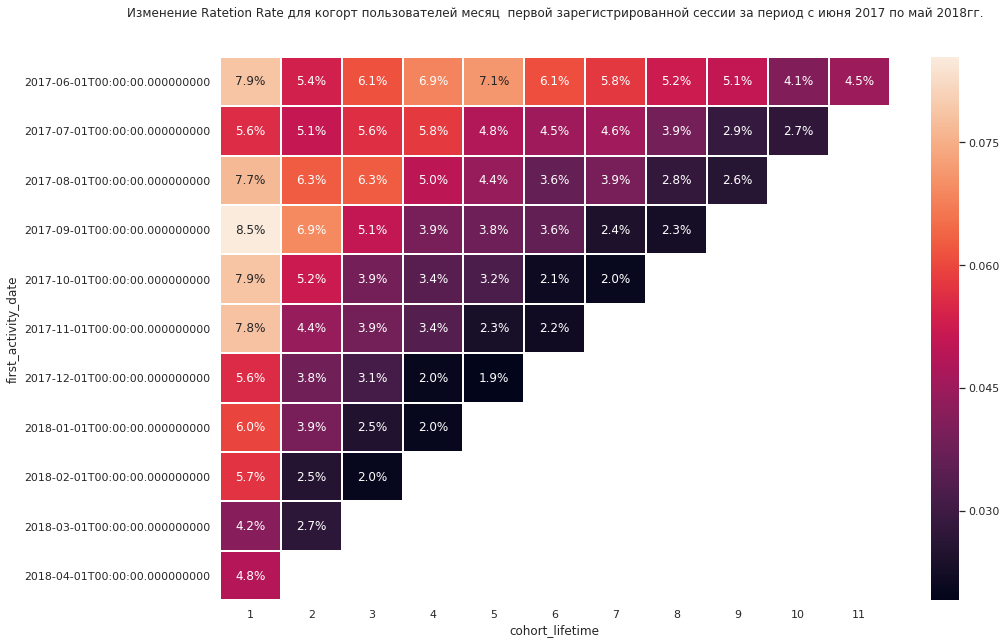

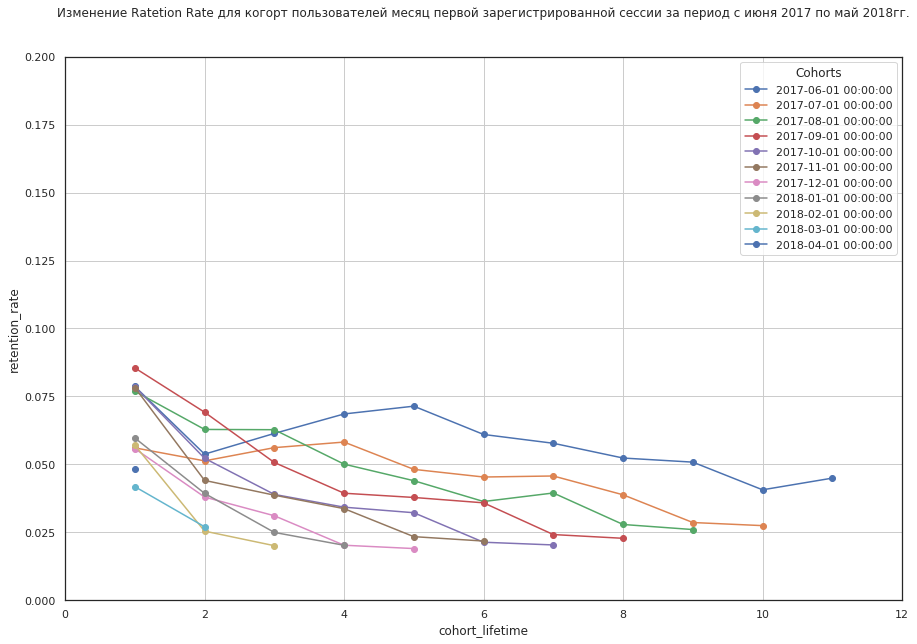

In [34]:
# вычислим Ratetion Rate по формуле:
cohorts['retention'] = cohorts['uid'] / cohorts['cohorts_user']
# Результат представим в сводной таблице
retention_pivot = cohorts.pivot_table(index = 'first_activity_date',
                                     columns = 'cohort_lifetime',
                                     values = 'retention',
                                     aggfunc = 'sum')
# для наглядности "наложим" на результат тепловую карту
import seaborn as sns
from matplotlib import pyplot as plt
sns.set(style = 'white')
plt.figure(figsize = (15,10))
sns.heatmap(retention_pivot, annot=True, fmt = '.1%', linewidths = 1)
plt.title('Изменение Ratetion Rate для когорт пользователей месяц  первой зарегистрированной сессии \
за период с июня 2017 по май 2018гг.', pad = 40)
plt.show()

# Построим график:
cohorts.pivot_table(index = 'cohort_lifetime',
                                     columns = 'first_activity_date',
                                     values = 'retention',
                                     aggfunc = 'sum').plot(figsize = (15,10), xlim = (0,12), ylim =(0.0, 0.2), 
                                                           style = 'o-')
plt.title('Изменение Ratetion Rate для когорт пользователей месяц первой зарегистрированной сессии \
за период с июня 2017 по май 2018гг.', pad = 40)
plt.grid()
plt.ylabel('retention_rate')
plt.legend(title = 'Сohorts')
plt.show()


Найдем средний коэффициент удержания для когорт: 

In [35]:
# Сложим значения в каждой колонке и найдем среднее. Затем усредним результат:
(retention_pivot.mean(axis = 0)).mean()

0.04167273087332413

**Коэффициент удержания для когорт пользователей "месяц  первой зарегистрированной сессии" на 0-lifetime всегда равен 100%. На 1-lifetime коэффициент удержания резко падает во всех когортах. И с каждым периодом lifetime уменьшается. В среднем коэффициент удержания во всех когортах ~ 4%. Т.е. только 4% пользователей возвращаются.**



Сейчас аналогично вычислим  Ratetion Rate для когорт "категория устройства пользователя, с которого была зарегистрирована первая интернет - сессия". 

Добавим в таблицу visits столбец 'first_device' - категория устройства пользователя, с которого была зарегистрирована первая интернет - сессия:

In [36]:
# Получение категории устройства пользователя, с которого была зарегистрирована первая интернет - сессия:
visits_devaice = visits.groupby('uid')[['device', 'first_activity_date']].first().copy()
# Переименуем столбец:
visits_devaice = visits_devaice.rename(columns = {'device': 'first_device'})
visits_devaice.head(5) 

,first_device,first_activity_date
uid,,
11863502262781,touch,2018-03-01
49537067089222,touch,2018-02-01
297729379853735,desktop,2017-06-01
313578113262317,desktop,2017-09-01
325320750514679,desktop,2017-09-01


In [37]:
# Присоединим столбец first_device к таблице visits:
visits = visits.merge(visits_devaice, on = ['uid', 'first_activity_date'])
visits.head(5)

,device,end_ts,source_id,start_ts,uid,visits_year,visits_month,visits_week,visits_date,visits_weekday_name,visits_weekday,session_sec,first_activity_date,cohort_lifetime,first_device
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,2017-12-01,Wednesday,2,1080.0,2017-12-01,0,touch
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,2018-02-01,Monday,0,1680.0,2018-02-01,0,desktop
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,7,26,2017-07-01,Saturday,5,0.0,2017-07-01,0,touch
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,2018-05-01,Sunday,6,1440.0,2018-03-01,2,desktop
4,desktop,2018-03-09 20:33:00,4,2018-03-09 20:05:00,16174680259334210214,2018,3,10,2018-03-01,Friday,4,1680.0,2018-03-01,0,desktop


In [38]:
# Удалим пользователей, которые еще не "дожили" до 6 месяца lifetime:
list_ = ['2018-01-01', '2018-02-01', '2018-03-01', '2018-04-01', '2018-05-01']
visits_device_no = visits.query('first_activity_date != @list_').copy()
# Посчитаем количество пользователей на определенный месяц жизни для каждой когорты:
cohorts_device = visits_device_no.groupby(['first_device', 'cohort_lifetime']).agg({'uid': 'nunique'}).reset_index()
# Выделим в отдельную таблицу количество пользователей для 0 - lifetime:
inital_user_count_1 = cohorts_device[cohorts_device['cohort_lifetime'] == 0][['first_device', 'uid']]
inital_user_count_1 = inital_user_count_1.rename(columns = {'uid': 'cohorts_first_device'})
# Соединим cohorts_device и inital_user_count_1
cohorts_device = cohorts_device.merge(inital_user_count_1, on = 'first_device')
# Удалим данные содержащие cohort_lifetime  = 0, т.к. RR всегда на 0-lifetime = 100%:
cohorts_device = cohorts_device.query('cohort_lifetime != "0"')
cohorts_device.sample(5)

,first_device,cohort_lifetime,uid,cohorts_first_device
22,touch,10,180,37271
2,desktop,2,5015,94506
1,desktop,1,6984,94506
23,touch,11,127,37271
20,touch,8,421,37271


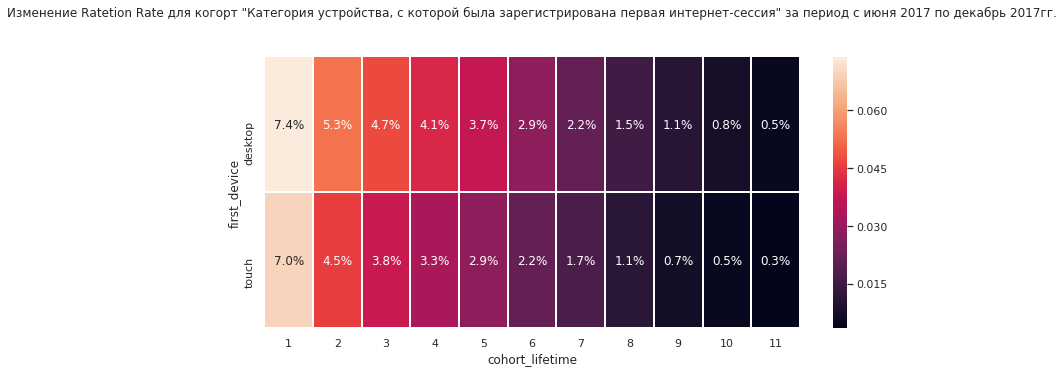

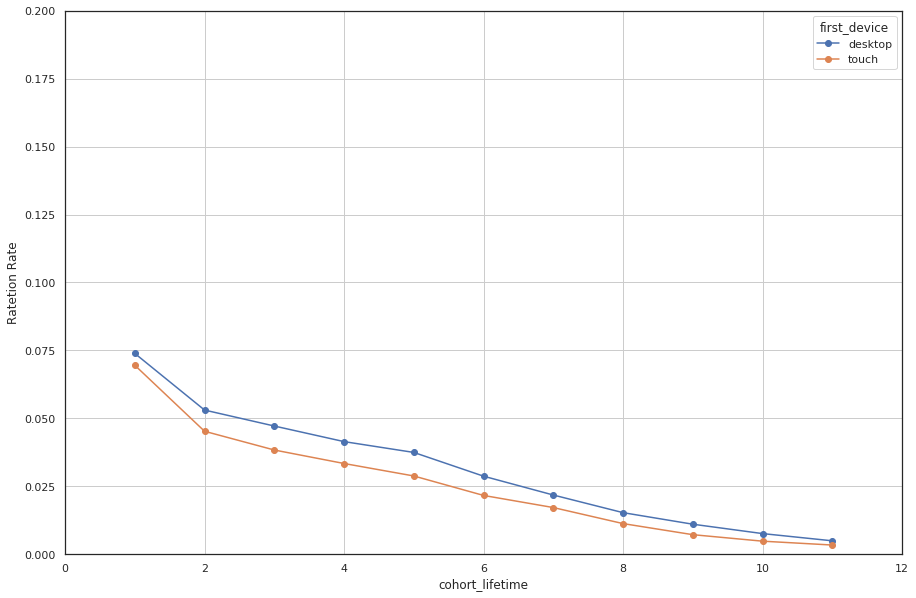

In [39]:
# вычислим Ratetion Rate по формуле:
cohorts_device['retention'] = cohorts_device['uid'] / cohorts_device['cohorts_first_device']
# Результат представим в виде сводной таблицы
retention_pivot_device = cohorts_device.pivot_table(index = 'first_device',
                                     columns = 'cohort_lifetime',
                                     values = 'retention',
                                     aggfunc = 'sum')
# Добавим тепловую карту:
import seaborn as sns
from matplotlib import pyplot as plt
sns.set(style = 'white')
plt.figure(figsize = (12,5))
sns.heatmap(retention_pivot_device, annot=True, fmt = '.1%', linewidths = 1)
plt.title('Изменение Ratetion Rate для когорт "Категория устройства, \
с которой была зарегистрирована первая интернет-сессия" за период с июня 2017 по декабрь 2017гг.', pad = 40)
plt.show()

# Построим график:
cohorts_device.pivot_table(index = 'cohort_lifetime',
                                     columns = 'first_device',
                                     values = 'retention',
                                     aggfunc = 'sum').plot(figsize = (15,10), xlim = (0,12), ylim =(0.0, 0.2), 
                                                           style = 'o-', grid = True)
plt.ylabel('Ratetion Rate')
plt.show()

In [40]:
# Найдем среднее для каждой когорты:
retention_pivot_device.mean(axis = 1)

first_device
desktop    0.031147
touch      0.025545
dtype: float64

**Видим, что коэффициент удержания в когортах "категория устройства, с которого была зарегистрирована первая интернет- сессия" с каждым периодом lifetime уменьшается (приближается к 0). Cреднее значение в когортах ~ 3%.**

И,  нам осталось вычислить Ratetion Rate для когорт "первый рекламный источник, из которого "пришел" пользователь". 

Добавим в таблицу visits столбец 'first_source_id' - первый рекламный источник, из которого "пришел" пользователь:

In [41]:
# Выясним первый рекламный источник для каждого пользователя. Результат сохраним в таблицу first_source_id:
first_source_id = visits.groupby(['uid'])[['start_ts','source_id']].first().reset_index()
# Представим дату в столбце 'start_ts' в виде: год-месяц-01(это месяц первой зарегистрированной интернет-сессии)
first_source_id['start_ts'] = first_source_id['start_ts'].astype('datetime64[M]')
# Переименуем названия  в столбцах start_ts и source_id таблицы first_source_id:
first_source_id = first_source_id.rename(columns = {'start_ts': 'first_activity_date', 'source_id': 'first_source_id'})
# Присоединим к таблице visits новый столбец first_source_id:
visits = visits.merge(first_source_id, on = ['uid', 'first_activity_date'])
# Удалим пользователей, которые еще не "дожили" до 6 месяца lifetime:
list_ = ['2018-01-01', '2018-02-01', '2018-03-01', '2018-04-01', '2018-05-01']
visits_source_id_no = visits.query('first_activity_date != @list_')
# Посчитаем количество пользователей на определенный месяц жизни для каждой когорты:
cohorts_source_id = visits_source_id_no.groupby(['first_source_id', 'cohort_lifetime']).agg({'uid': 'nunique'})\
                    .reset_index()
# Выделим в отдельную таблицу количество пользователей для 0 - lifetime:
inital_user_count_2 = cohorts_source_id[cohorts_source_id['cohort_lifetime'] == 0][['first_source_id', 'uid']]
inital_user_count_2 = inital_user_count_2.rename(columns = {'uid': 'cohorts_ first_source_id'})
# Соединим cohorts_source_id и inital_user_count_2:
cohorts_source_id = cohorts_source_id.merge(inital_user_count_2, on = 'first_source_id')
# Удалим данные содержащие cohort_lifetime  = 0, т.к. RR всегда на 0-lifetime = 100%:
cohorts_source_id = cohorts_source_id.query('cohort_lifetime != "0"')
# По рекламному источнику №7 очень мало данных, поэтому удалим его из выборки:
cohorts_source_id = cohorts_source_id.query('first_source_id != "7"')
cohorts_source_id

,first_source_id,cohort_lifetime,uid,cohorts_ first_source_id
1,1,1,343,5657
2,1,2,235,5657
3,1,3,165,5657
4,1,4,136,5657
5,1,5,130,5657
...,...,...,...,...
83,10,7,22,2963
84,10,8,9,2963
85,10,9,8,2963
86,10,10,6,2963


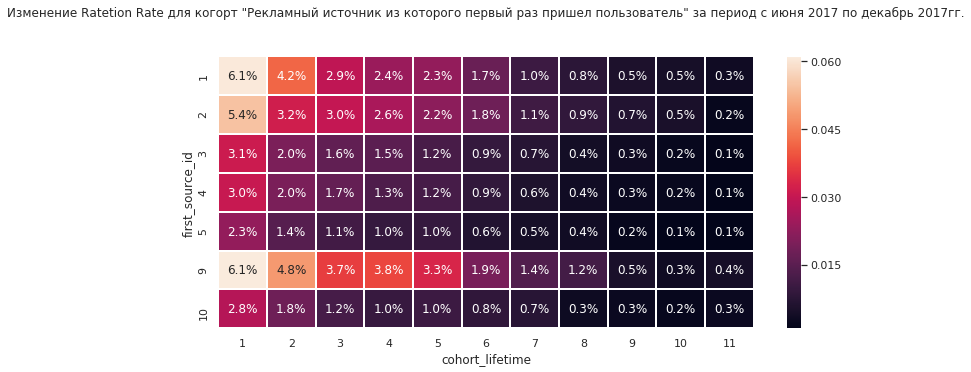

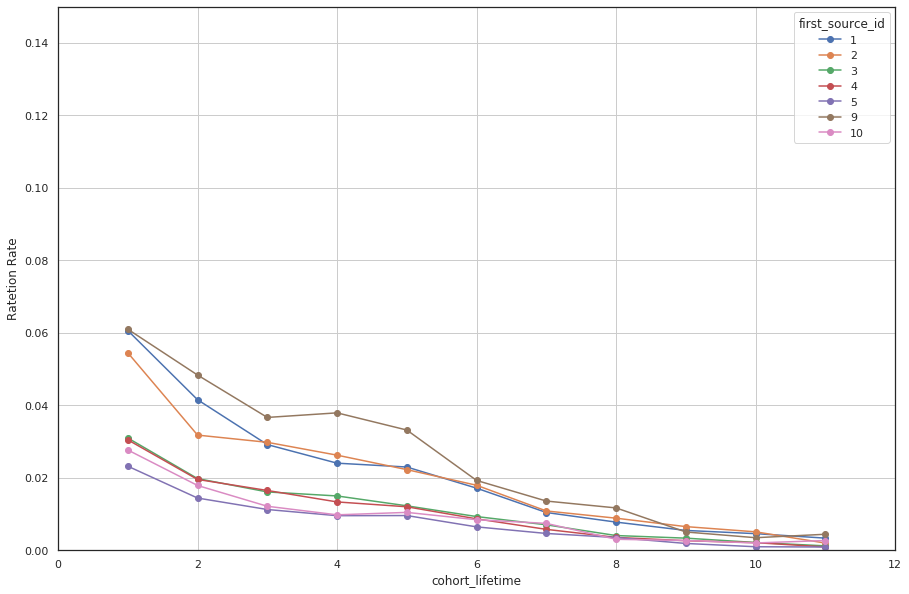

In [42]:
# Рассчитаем Retention Rate:
cohorts_source_id['retention'] = cohorts_source_id['uid'] / cohorts_source_id['cohorts_ first_source_id']
# Результат представим в виде сводной таблицы:
retention_pivot_source_id = cohorts_source_id.pivot_table(index = 'first_source_id',
                                     columns = 'cohort_lifetime',
                                     values = 'retention',
                                     aggfunc = 'sum')

# Наложим тепловую карту на результат:
import seaborn as sns
from matplotlib import pyplot as plt
sns.set(style = 'white')
plt.figure(figsize = (12,5))
sns.heatmap(retention_pivot_source_id, annot=True, fmt = '.1%', linewidths = 1)
plt.title('Изменение Ratetion Rate для когорт "Рекламный источник \
из которого первый раз пришел пользователь" за период с июня 2017 по декабрь 2017гг.', pad = 40)
plt.show()

# Построим график:
cohorts_source_id.pivot_table(index = 'cohort_lifetime',
                                     columns = 'first_source_id',
                                     values = 'retention',
                                     aggfunc = 'sum').plot(figsize = (15,10), xlim = (0,12), ylim =(0.0, 0.15),
                                                           style = 'o-', grid = True)
plt.ylabel('Ratetion Rate')
plt.show()

In [43]:
# Найдем среднее для каждой когорты:
retention_pivot_source_id.mean(axis = 1).reset_index().T

,0,1,2,3,4,5,6
first_source_id,1.00000,2.000000,3.000000,4.00000,5.000000,9.000000,10.000000
0,0.02065,0.019626,0.011028,0.01051,0.007857,0.024968,0.009481


**Итак, также наблюдаем уменьшение коэффициента удержания в каждой кагорте "первый рекламный источник, из которого пришел пользователь" с каждым периодом lifetime. Т.е. с каждым месяцем возвращается клиентов все меньше и меньше. Можем выделить топ-3 рекламных источника с высоким коэффициентом удержания: №1, 2, 9 (в  среднем коэффициент удержания ~2%)**

*Когда люди начинают покупать?*

Для того, чтобы ответить на этот вопрос нужно найти время, которое проходит от первой зарегистрированной сессии пользователя до первого его заказа.

План действий:
1) Находим для каждого пользователя дату и время первой зарегистрированной интернет  - сессии из таблицы visits

2) Находим для каждого пользователя дату и время первого заказа из таблицы orders

3) Объединяем полученные результаты из таблиц visits и orders

4) Находим разность в минутах.

5) Строим графики.


Приступим.

In [44]:
# Найдем первую дату и время зарегистрированной интернет-сессии для каждого пользователя сохраним 
#в таблице visits_start_ts
visits_start_ts = visits.groupby('uid')['start_ts'].min().reset_index()
visits_start_ts

,uid,start_ts
0,11863502262781,2018-03-01 17:27:00
1,49537067089222,2018-02-06 15:55:00
2,297729379853735,2017-06-07 18:47:00
3,325320750514679,2017-09-30 14:29:00
4,397399764396656,2018-01-18 12:32:00
...,...,...
209806,18446316582013423015,2018-02-26 10:14:00
209807,18446403737806311543,2017-11-30 03:36:00
209808,18446424184725333426,2017-12-06 20:32:00
209809,18446556406699109058,2018-01-01 16:29:00


In [45]:
# Первую дату и время заказа каждого пользователя сохраним в таблице orders_first:
orders_first = orders.groupby('uid')['buy_ts'].min().reset_index()
orders_first

,uid,buy_ts
0,313578113262317,2018-01-03 21:51:00
1,1575281904278712,2017-06-03 10:13:00
2,2429014661409475,2017-10-11 18:33:00
3,2464366381792757,2018-01-28 15:54:00
4,2551852515556206,2017-11-24 10:14:00
...,...,...
36518,18445147675727495770,2017-11-24 09:03:00
36519,18445407535914413204,2017-09-22 23:55:00
36520,18445601152732270159,2018-03-26 22:54:00
36521,18446156210226471712,2018-02-18 19:34:00


In [46]:
# Объединим полученные результаты
orders_first_ = orders_first.merge(visits_start_ts, on = 'uid', how = 'outer')
orders_first_

,uid,buy_ts,start_ts
0,313578113262317,2018-01-03 21:51:00,NaT
1,1575281904278712,2017-06-03 10:13:00,2017-06-03 10:13:00
2,2429014661409475,2017-10-11 18:33:00,2017-10-11 17:14:00
3,2464366381792757,2018-01-28 15:54:00,2018-01-27 20:10:00
4,2551852515556206,2017-11-24 10:14:00,2017-11-24 10:14:00
...,...,...,...
216247,18446316582013423015,NaT,2018-02-26 10:14:00
216248,18446403737806311543,NaT,2017-11-30 03:36:00
216249,18446424184725333426,NaT,2017-12-06 20:32:00
216250,18446556406699109058,NaT,2018-01-01 16:29:00


Из полученного результата видим, что некоторые пользователи "зашли" в наше приложение, но не оформили заказ. Вычислим процент таких пользователей.

In [47]:
# Найдем отношение количества пропусков в столбце 'buy_ts'к общему количеству строк:
(orders_first_['buy_ts'].isnull().sum()) / len(orders_first_)

0.8311090764478479

**В результате: ~ 84% пользователей не выполнили заказ. Получается конверсия из посетителя в покупателя ~17%**

А сейчас найдем время для пользователей, которые выполнили заказ:

In [48]:
# Оставляем в таблице только строки с заказами:
orders_first = orders_first.merge(visits_start_ts, on = 'uid')
# В отдельные столбцы сохраняем день, время в минутах от первой сессии до заказа:
import numpy as np
orders_first['days'] = (round((orders_first['buy_ts'] - orders_first['start_ts']) / np.timedelta64(1, 'D'))).\
                                                                                     astype('int')
orders_first['minute'] = ((orders_first['buy_ts'] - orders_first['start_ts']) / np.timedelta64(1, 'm')).astype('int')
orders_first # Посмотрим на результат

,uid,buy_ts,start_ts,days,minute
0,1575281904278712,2017-06-03 10:13:00,2017-06-03 10:13:00,0,0
1,2429014661409475,2017-10-11 18:33:00,2017-10-11 17:14:00,0,79
2,2464366381792757,2018-01-28 15:54:00,2018-01-27 20:10:00,1,1184
3,2551852515556206,2017-11-24 10:14:00,2017-11-24 10:14:00,0,0
4,3077748354309989,2018-03-03 12:33:00,2018-03-03 12:08:00,0,25
...,...,...,...,...,...
30077,18442290965339407211,2018-02-05 19:39:00,2018-02-05 19:35:00,0,4
30078,18445147675727495770,2017-11-24 09:03:00,2017-08-20 13:30:00,96,137973
30079,18445407535914413204,2017-09-22 23:55:00,2017-09-22 23:48:00,0,7
30080,18446156210226471712,2018-02-18 19:34:00,2017-11-07 10:01:00,103,148893


Посмотрим на распределения данных: построим гистограмму, "ящик с усами":

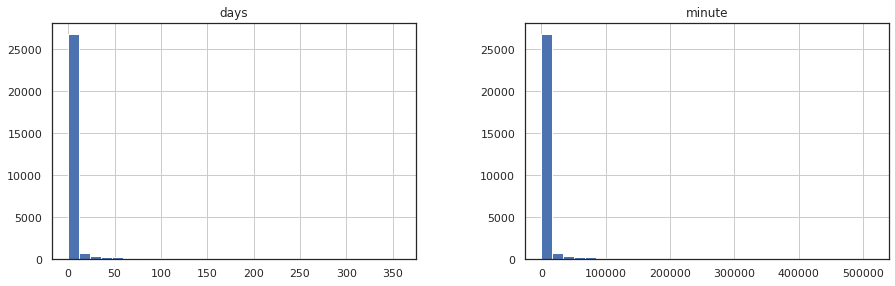

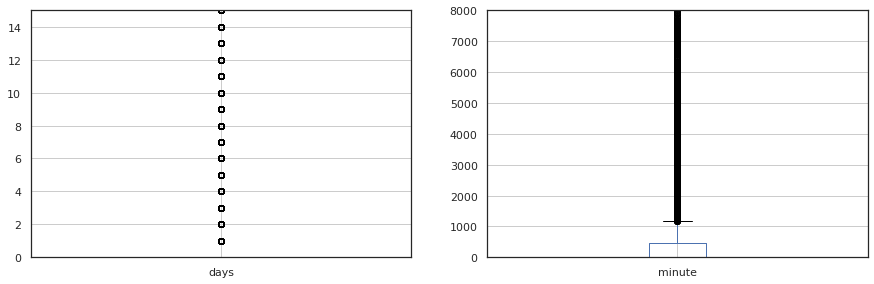

In [49]:
# Построение гистограммы
plt.figure(figsize = (15,10))
orders_first.hist('days', bins = 30, ax = plt.subplot(2,2,1))
orders_first.hist('minute', bins = 30, ax = plt.subplot(2,2,2))
plt.show()
# Построение boxplot:
plt.figure(figsize = (15,10))
orders_first.boxplot('days', ax = plt.subplot(2,2,1))
plt.ylim(0, 15)
orders_first.boxplot('minute', ax = plt.subplot(2,2,2))
plt.ylim(0, 8000)
plt.show()

In [50]:
# Вычислим значение медианы для выборок
print('median(days) {}'.format(orders_first['days'].median()))
print('median(minute) {}'.format(orders_first['minute'].median()))


median(days) 0.0
median(minute) 12.0


 **В результате получили: большинство пользователей(~50%) после первой зарегистрированной сессии формируют заказ в этот же день и тратят  не больше ~ 12 мин.**

**Остальные 50% пользователей тратят  не меньше ~ 12 минут до заказа. Время от первой интернет-сессии до первого заказа может доходить до 1500 мин.(~1 день)** 



Сейчас вычислим приблизительное время от первой зарегистрированной интернет-сессии до первого заказа для групп "категория устройства". Для этого к таблице orders_first присоединим данные из столбца 'first_davice' (сразу добавим столбец 'first_source_id') из таблицы visits:

In [51]:
# Сохраним нужные столбцы из таблицы visits в отдельный датафрейм:
first_davice_source_id = visits.groupby('uid')[['first_device', 'first_source_id']].first().reset_index()
# "Склеим" таблицы orders_first и first_davice_source_id:
orders_first = orders_first.merge(first_davice_source_id, on = 'uid', how = 'left')
# Удалим из выборки 7 источник, т.к. по нему очень мало данных:
orders_first = orders_first.query('first_source_id != "7"')
orders_first # Проверим результат

,uid,buy_ts,start_ts,days,minute,first_device,first_source_id
0,1575281904278712,2017-06-03 10:13:00,2017-06-03 10:13:00,0,0,touch,10
1,2429014661409475,2017-10-11 18:33:00,2017-10-11 17:14:00,0,79,desktop,3
2,2464366381792757,2018-01-28 15:54:00,2018-01-27 20:10:00,1,1184,desktop,5
3,2551852515556206,2017-11-24 10:14:00,2017-11-24 10:14:00,0,0,desktop,5
4,3077748354309989,2018-03-03 12:33:00,2018-03-03 12:08:00,0,25,touch,3
...,...,...,...,...,...,...,...
30077,18442290965339407211,2018-02-05 19:39:00,2018-02-05 19:35:00,0,4,touch,3
30078,18445147675727495770,2017-11-24 09:03:00,2017-08-20 13:30:00,96,137973,touch,5
30079,18445407535914413204,2017-09-22 23:55:00,2017-09-22 23:48:00,0,7,desktop,3
30080,18446156210226471712,2018-02-18 19:34:00,2017-11-07 10:01:00,103,148893,desktop,3


Посмотрим на распределения данных, предварительно сгруппировав их по 'first_device':

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


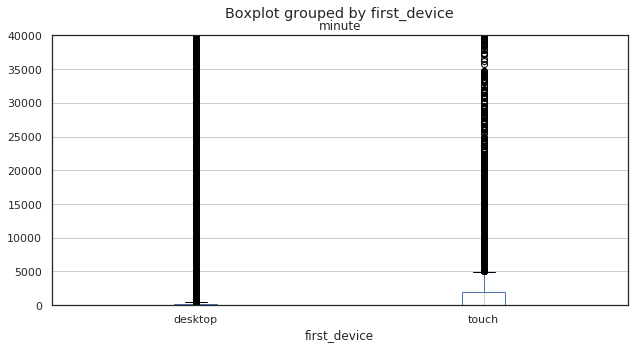

In [52]:
# Построение boxplot:
dannye_list = ['desktop', 'touch']
orders_first.query('first_device.isin(@dannye_list)').boxplot('minute', by = 'first_device',
                                                             figsize = (10,5))
plt.ylim(-10, 40000)
plt.show()


In [53]:
orders_first.groupby('first_device').agg({'days': 'median', 'minute': 'median'})

,days,minute
first_device,,
desktop,0,11
touch,0,17


**Для desktop: 50% пользователей тратят не больше ~11мин. до заказа, остальные 50% - не меньше ~11 мин. Но заказ в основном формируют в этот же день**

**Для touch: 50% пользователей тратят не больше ~17мин. до заказа, остальные 50% - не меньше ~17 мин. 
Время от первой зарегистрированной сессии до заказа может доходить до 5000 мин.(~ 3 дня)**

Посмотрим на распределения данных, предварительно сгруппировав их по 'first_source_id':

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


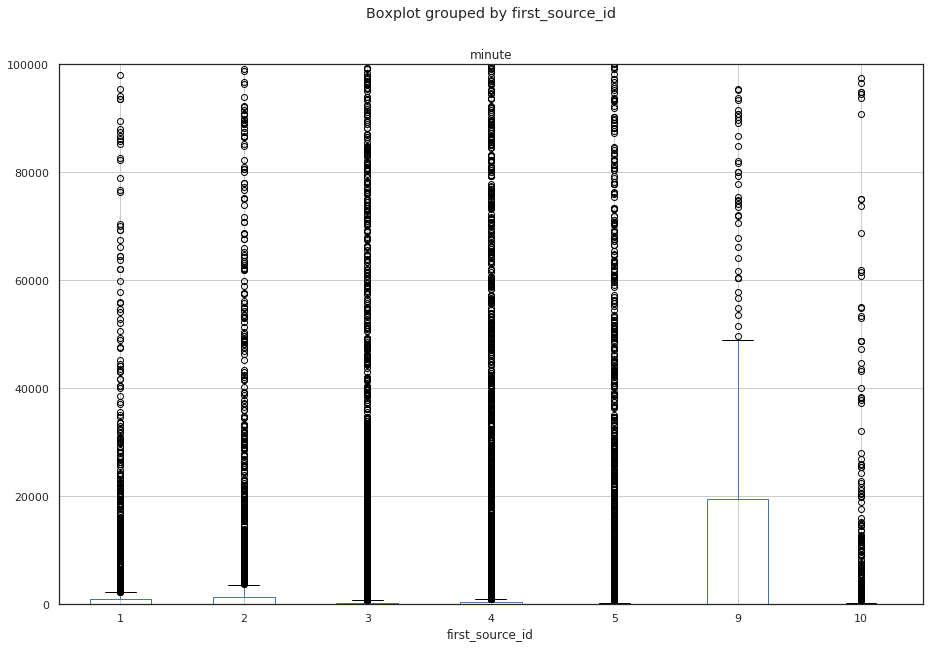

In [54]:
# Построение boxplot:
dannye_list = ['1', '2', '3', '4', '5', '9', '10']
orders_first.query('first_source_id.isin(@dannye_list)').boxplot('minute', by = 'first_source_id',
                                                             figsize = (15,10))
plt.ylim(-10, 100000)
plt.show()

In [55]:
orders_first.groupby('first_source_id').agg({'days': 'median', 'minute': 'median'}).T

first_source_id,1,2,3,4,5,9,10
days,0,0,0,0,0,0,0
minute,16,16,12,12,9,50,10


**В итоге: для 50% пользователей время от первой зарегистрированной интернет-сессии до заказа составляет для рекламных источников №1, 2, 3, 4, 5, 10 не больше ~9-16 мин. Для остальных 50% - не меньше ~9-16мин. Но в основном заказы формируют в этот же день.**

**Выделяется источник №9: время для 50% пользователей составляет не больше ~50мин. Для остальных 50% - не меньше ~50 мин. Из графика видно что время может доходить до 40000мин. (до 28 дней)**

*Сколько раз покупают за период? Какой средний чек?*

Для того чтобы ответить на первый вопрос, найдем количество заказов в день, в месяц. Построим графики.

Чтобы правильно вычислить значения среднего чека разберемся с данным понятием. Итак, "средний чек - сумма выручки  за определенный период времени, деленная на количество заказов за тот же период".

Приступим к расчетам.


Обратимся к таблице orders и добавим столбец 'buy_ts_date', который будет содержать только дату заказа без времени. А также в отдельные столбцы выделим год заказа('buy_ts_year') и соответствующий месяц('buy_ts_month'):

In [56]:
# Создание столбцов:
orders['buy_ts_date'] = orders['buy_ts'].dt.date
orders['buy_ts_year'] = orders['buy_ts'].dt.year
orders['buy_ts_month'] = orders['buy_ts'].dt.month
orders.head(5)

,buy_ts,revenue,uid,buy_ts_date,buy_ts_year,buy_ts_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017,6
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017,6
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017,6
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017,6
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017,6


Выведем на экран таблицу, которая будет содержать следующую информацию: количество заказов, сумму, средний чек за каждый день: 

In [57]:
# Сгруппируем данные таблицы orders по дате и вычислим количество, сумму, среднее для данных из столбца revenue:
buy_ts_days = orders.groupby('buy_ts_date').agg({'revenue': ['count', 'sum', 'mean']}).reset_index()
# превратим мультииндекс в более простой массив
buy_ts_days.columns = ["_".join(x) for x in buy_ts_days.columns.ravel()]
# Проверим результат:
buy_ts_days

,buy_ts_date_,revenue_count,revenue_sum,revenue_mean
0,2017-06-01,96,389.46,4.056875
1,2017-06-02,111,324.11,2.919910
2,2017-06-03,67,166.48,2.484776
3,2017-06-04,66,195.21,2.957727
4,2017-06-05,161,441.49,2.742174
...,...,...,...,...
359,2018-05-28,188,740.00,3.936170
360,2018-05-29,189,491.06,2.598201
361,2018-05-30,208,1021.69,4.911971
362,2018-05-31,610,4613.92,7.563803


Видим, что в таблицу "попала" дата 2018-06-01 - это начало нового месяца и интересует нас период: с июня 2017 по конец мая 2018 года, поэтому удалим данную информацию из полученной таблицы:

In [58]:
# Оставим в нашей таблице все строки, кроме 363 строки ('2018-06-01')
buy_ts_days = buy_ts_days.loc[:362]
buy_ts_days.tail(5)

,buy_ts_date_,revenue_count,revenue_sum,revenue_mean
358,2018-05-27,107,374.19,3.497103
359,2018-05-28,188,740.00,3.936170
360,2018-05-29,189,491.06,2.598201
361,2018-05-30,208,1021.69,4.911971
362,2018-05-31,610,4613.92,7.563803


Построим графики для распределения "Количество заказов в день":

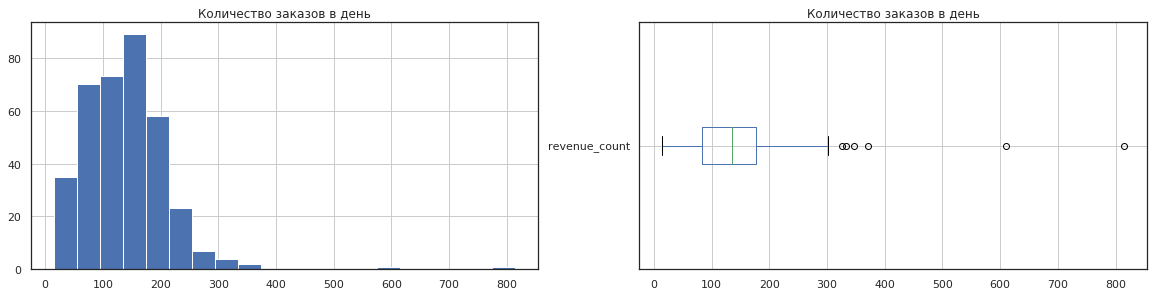

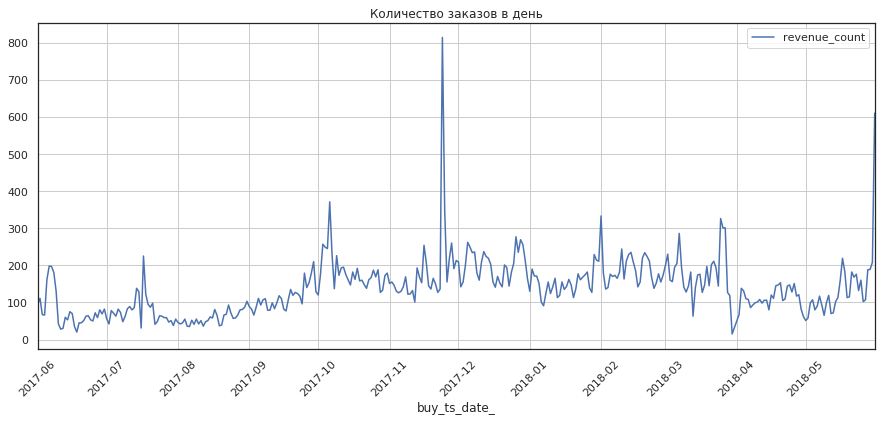

In [59]:
plt.figure(figsize = (20,10))
plt.subplot(2,2,1)
plt.title('Количество заказов в день')
buy_ts_days['revenue_count'].hist(bins = 20)
plt.subplot(2,2,2)
plt.title('Количество заказов в день')
buy_ts_days.boxplot('revenue_count', vert = False)
plt.show()
buy_ts_days.pivot_table(index = 'buy_ts_date_', values = 'revenue_count',
                       aggfunc = 'first').plot(figsize = (15,6), rot = 45, grid = True)

plt.title('Количество заказов в день')
plt.show()

In [60]:
buy_ts_days['revenue_count'].mean()

138.88154269972452

**Из графиков видим, что среднее количество заказов ~139 в день. В некоторые дни количество может доходить до 300 в день.**

Рассчитаем количество заказов, сумму и средний чек в месяц:

In [61]:
# Сгруппируем таблицу orders по столбцам 'buy_ts_year', 'buy_ts_month' и найдем нужные параметры:
buy_ts_month = orders.groupby(['buy_ts_year', 'buy_ts_month']).agg({'revenue': ['count', 'sum', 'mean']}).reset_index()
# превратим мультииндекс в более простой массив
buy_ts_month.columns = ["_".join(x) for x in buy_ts_month.columns.ravel()]
# Оставим в нашей таблице все строки, кроме 12 строки('2018-06-01')
buy_ts_month = buy_ts_month.loc[:11]
buy_ts_month

,buy_ts_year_,buy_ts_month_,revenue_count,revenue_sum,revenue_mean
0,2017,6,2354,9557.49,4.060106
1,2017,7,2363,12539.47,5.306589
2,2017,8,1807,8758.78,4.847139
3,2017,9,3387,18345.51,5.416448
4,2017,10,5679,27987.70,4.928280
5,2017,11,5659,27069.93,4.783518
6,2017,12,6218,36388.60,5.852139
7,2018,1,4721,19417.13,4.112927
8,2018,2,5281,25560.54,4.840095
9,2018,3,5326,28834.59,5.413930


Построим графики:

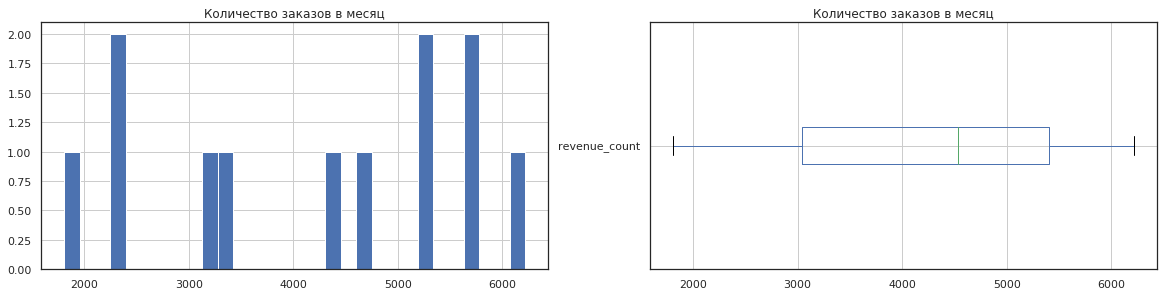

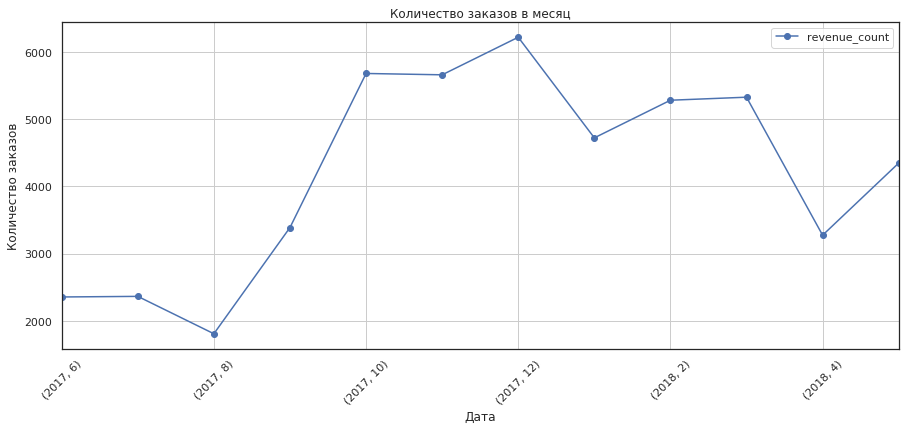

In [62]:
plt.figure(figsize = (20,10))
plt.subplot(2,2,1)
buy_ts_month['revenue_count'].hist(bins = 30)
plt.title('Количество заказов в месяц')
plt.subplot(2,2,2)
buy_ts_month.boxplot('revenue_count', vert = False)
plt.title('Количество заказов в месяц')
plt.show()
buy_ts_month.pivot_table(index = ['buy_ts_year_', 'buy_ts_month_'], values = 'revenue_count',
                       aggfunc = 'first').plot(figsize = (15,6), rot = 45, style = 'o-', grid = True)
plt.title('Количество заказов в месяц')
plt.ylabel('Количество заказов')
plt.xlabel('Дата')
plt.show()

In [63]:
buy_ts_month['revenue_count'].mean()

4201.166666666667

**В месяц количество заказов в среднем ~4201. В некоторые месяцы количество заказов может доходить до ~6500.**

**Если мы обратим внимание на нижний график, то поймем что количество заказов связано с новогодними праздниками, каникулами(самое большое количество заказов в ноябре - декабре). После новогодних праздников количество заказов уменьшается до апреля. В апреле видим, что резко уменьшается  количество заказов - связано это, скорее всего, с тем, что открывается дачный сезон. В мае наблюдается увеличение (связано это, скорее всего с майскими праздниками, выходными). И в летние месяцы также наблюдается уменьшение количества заказов до августа месяца: начинается сезон отпусков и многие театры  и другие организации уходят на каникулы**

Найдем количество заказов в день, в месяц для групп first_device - первое устройство, с которого подключился пользователь. Построим графики.

In [64]:
# Присоединим к таблице orders столбцы first_device и first_source_id:
visits_first = visits.groupby('uid')[['first_device', 'first_source_id']].first().reset_index()
orders = orders.merge(visits_first, on = 'uid', how = 'left')
orders = orders.loc[:50413]
orders.sample(5)

,buy_ts,revenue,uid,buy_ts_date,buy_ts_year,buy_ts_month,first_device,first_source_id
15967,2017-11-03 15:06:00,6.11,7389892278659359735,2017-11-03,2017,11,touch,3.0
38375,2018-03-05 21:11:00,1.95,13147937318497815103,2018-03-05,2018,3,touch,4.0
15978,2017-11-03 16:20:00,12.65,7667055488741459519,2017-11-03,2017,11,NaN,NaN
8583,2017-09-21 23:52:00,0.33,3605148382144603,2017-09-21,2017,9,NaN,NaN
39028,2018-03-08 15:28:00,3.67,14481163132396345939,2018-03-08,2018,3,NaN,NaN


In [65]:
# Сгруппируем данные таблицы orders по ['first_device','buy_ts_date']
# Найдем количество заказов, сумму, среднее арифметическое
buy_ts_days_device = orders\
                    .groupby(['first_device','buy_ts_date'])\
                    .agg({'revenue': ['count', 'sum', 'mean']})\
                    .reset_index()
# Убираем мультииндекс в названиях столбцов
buy_ts_days_device.columns = ["_".join(x) for x in buy_ts_days_device.columns.ravel()] 
buy_ts_days_device

,first_device_,buy_ts_date_,revenue_count,revenue_sum,revenue_mean
0,desktop,2017-06-01,58,292.59,5.044655
1,desktop,2017-06-02,73,168.94,2.314247
2,desktop,2017-06-03,41,101.68,2.480000
3,desktop,2017-06-04,45,96.48,2.144000
4,desktop,2017-06-05,104,262.21,2.521250
...,...,...,...,...,...
721,touch,2018-05-27,15,75.83,5.055333
722,touch,2018-05-28,20,71.90,3.595000
723,touch,2018-05-29,26,56.85,2.186538
724,touch,2018-05-30,45,147.62,3.280444


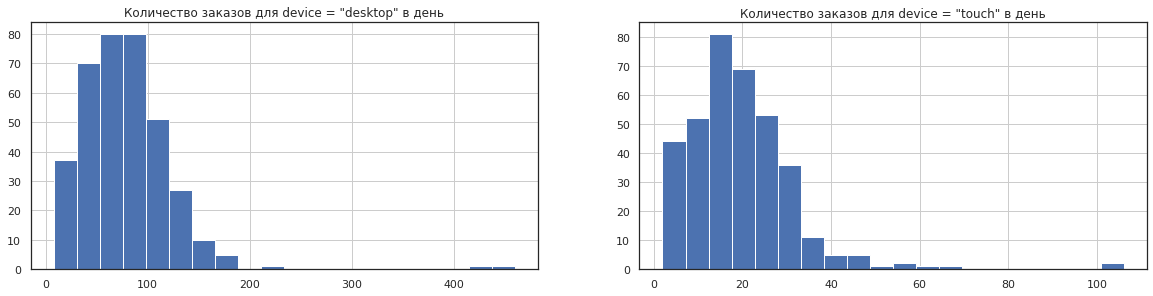

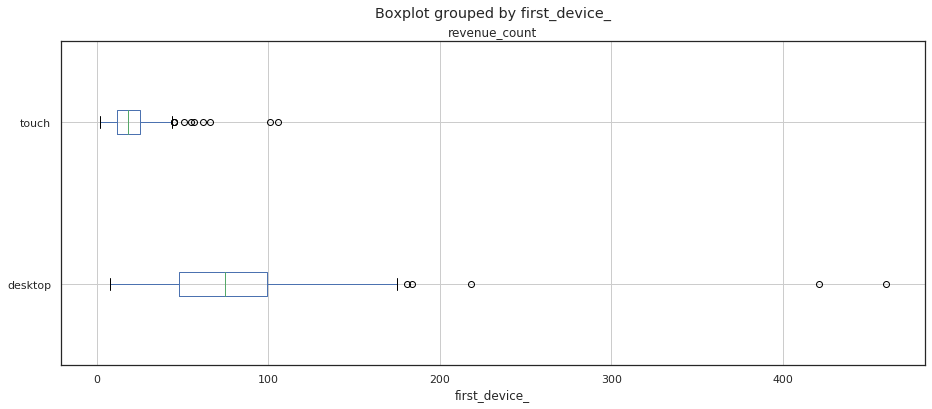

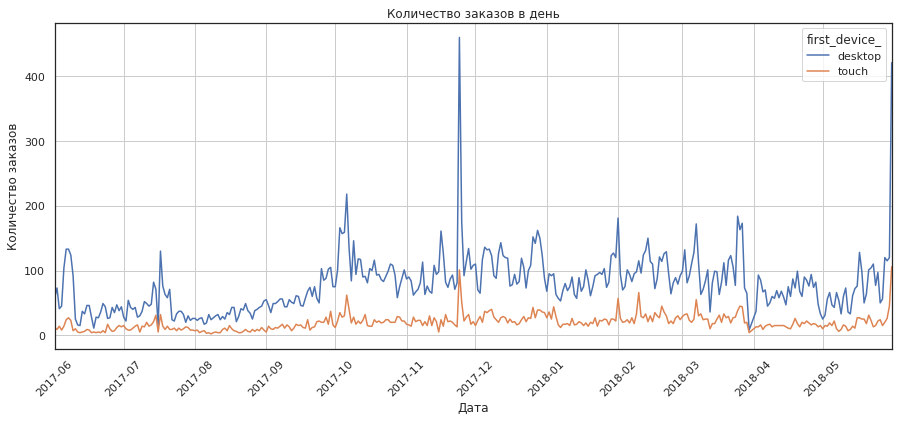

In [66]:
plt.figure(figsize = (20,10))
plt.subplot(2,2,1)
buy_ts_days_device.query('first_device_ == "desktop"')['revenue_count'].hist(bins = 20)
plt.title('Количество заказов для device = "desktop" в день')
plt.subplot(2,2,2)
buy_ts_days_device.query('first_device_ == "touch"')['revenue_count'].hist(bins = 20)
plt.title('Количество заказов для device = "touch" в день')
plt.show()
buy_ts_days_device.boxplot('revenue_count', by = 'first_device_', vert = False, figsize = (15,6))
plt.show()
buy_ts_days_device.pivot_table(index = 'buy_ts_date_',
                              columns = 'first_device_',
                              values = 'revenue_count',
                              aggfunc = 'first').plot(figsize = (15,6), rot = 45, grid = True)
plt.title('Количество заказов в день')
plt.ylabel('Количество заказов')
plt.xlabel('Дата')
plt.show()

In [67]:
buy_ts_days_device.groupby('first_device_').agg({'revenue_count': 'mean'})

,revenue_count
first_device_,
desktop,78.906336
touch,19.506887


**Количество заказов для device = "desktop" в день в среднем составляет ~ 79. В отдельные дни может доходить до ~170 - 180.**

**Количество заказов для device = "touch" в день в среднем составляет ~ 20. В  отдельные дни может доходить до ~50  в день.**

Рассчитаем для месяца:

In [68]:
# Сгруппируем таблицу orders по ['first_device','buy_ts_year', 'buy_ts_month']
# Найдем количество, сумму, среднее арифметическое:
buy_ts_days_device_month = orders.groupby(['first_device','buy_ts_year', 'buy_ts_month']).\
                           agg({'revenue': ['count', 'sum', 'mean']}).reset_index()
buy_ts_days_device_month.columns = ["_".join(x) for x in buy_ts_days_device_month.columns.ravel()]
buy_ts_days_device_month.sample(5)

,first_device_,buy_ts_year_,buy_ts_month_,revenue_count,revenue_sum,revenue_mean
8,desktop,2018,2,2880,11144.14,3.869493
1,desktop,2017,7,1369,7092.26,5.180614
11,desktop,2018,5,2544,11746.21,4.617221
0,desktop,2017,6,1504,6093.42,4.051476
19,touch,2018,1,664,2247.52,3.384819


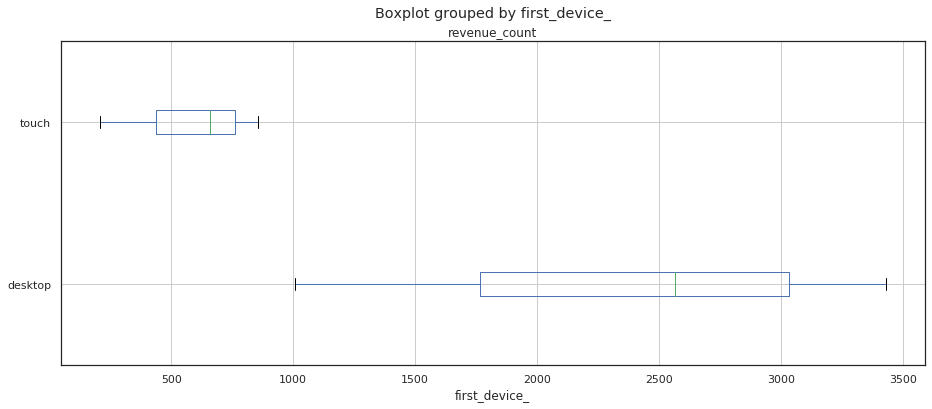

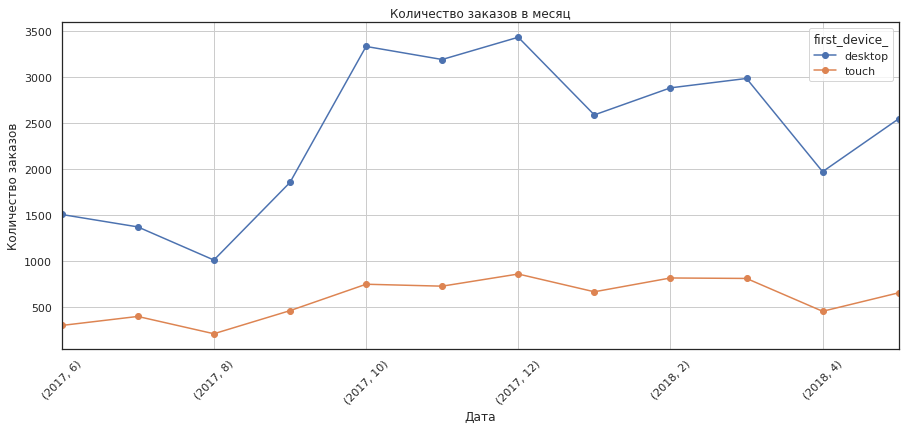

In [69]:
# Построим графики:
buy_ts_days_device_month.boxplot('revenue_count', by = 'first_device_', vert = False, figsize = (15,6))
plt.show()
buy_ts_days_device_month.pivot_table(index = ['buy_ts_year_', 'buy_ts_month_'],
                              columns = 'first_device_',
                              values = 'revenue_count',
                              aggfunc = 'first').plot(figsize = (15,6), rot = 45, grid = True, style = 'o-')
plt.title('Количество заказов в месяц')
plt.ylabel('Количество заказов')
plt.xlabel('Дата')
plt.show()

In [70]:
buy_ts_days_device_month.groupby('first_device_').agg({'revenue_count': 'mean'})

,revenue_count
first_device_,
desktop,2386.916667
touch,590.083333


**Количество заказов для device = "desktop" в месяц в среднем составляет ~ 2387. В отдельные дни может доходить до ~3400**

**Количество заказов для device = "touch" в месяц в среднем составляет ~ 590. В отдельные дни может доходить до ~800-900 в месяц.**

**Также на нижнем графике мы видим, что количество заказов для двух устройств тесно связано с новогодними, майскими праздниками и каникулами - наблюдается увеличение количества заказов. В летние месяцы и апреле месяце - резкое уменьшение заказов - начинается дачный сезон и отпусков.**


Найдем количество заказов в день, в месяц для групп first_source_id - рекламный источник, из которого первый раз пришел пользователь пользователь. Построим графики.

In [71]:
# Сгруппируем данные таблицы orders по ['first_source_id','buy_ts_date']
# Найдем количество заказов, сумму, среднее арифметическое
buy_ts_days_source = orders.groupby(['first_source_id','buy_ts_date']).agg({'revenue': ['count', 'sum', 'mean']})\
.reset_index()
buy_ts_days_source.columns = ["_".join(x) for x in buy_ts_days_source.columns.ravel()]
buy_ts_days_source

,first_source_id_,buy_ts_date_,revenue_count,revenue_sum,revenue_mean
0,1.0,2017-06-01,10,148.68,14.868000
1,1.0,2017-06-02,4,10.39,2.597500
2,1.0,2017-06-03,10,19.27,1.927000
3,1.0,2017-06-04,4,7.54,1.885000
4,1.0,2017-06-05,17,31.72,1.865882
...,...,...,...,...,...
2414,10.0,2018-05-27,2,1.47,0.735000
2415,10.0,2018-05-28,8,9.35,1.168750
2416,10.0,2018-05-29,5,5.58,1.116000
2417,10.0,2018-05-30,6,8.67,1.445000


/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


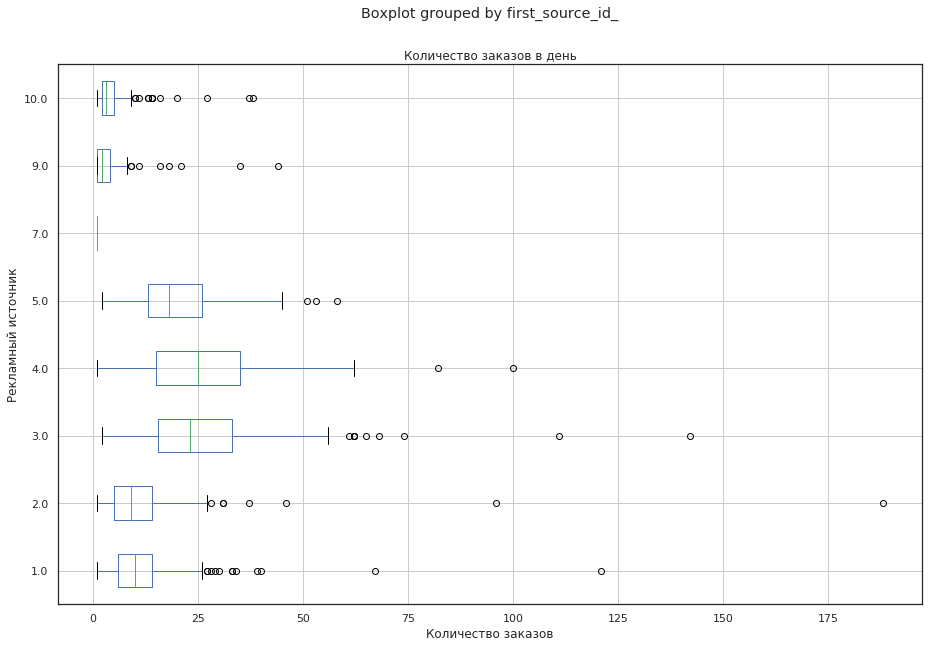

In [72]:
# Построим график:
buy_ts_days_source.boxplot('revenue_count', by = 'first_source_id_', vert = False, figsize = (15,10))
plt.title('Количество заказов в день')
plt.ylabel('Рекламный источник')
plt.xlabel('Количество заказов')
plt.show()


In [73]:
round(buy_ts_days_source.groupby('first_source_id_').agg({'revenue_count': 'mean'})).T

first_source_id_,1.0,2.0,3.0,4.0,5.0,7.0,9.0,10.0
revenue_count,11.0,11.0,25.0,26.0,19.0,1.0,3.0,4.0


**В результате:**

**Исходя из графика, самое большое количество заказов в среднем приносят рекламные источники, из которых первый раз пришел пользователь: №3, 4 - ~ 26 заказов в день. В отдельные дни количество может доходить до: для №4 - ~65; №3 - ~55. Но если смотреть на распределения данных указанных выше рекламных источников: №4 - устоявшийся источник(медиана расположена посередине "ящика"), т.е. он стабилен: "приносит" в день количество заказов от ~(2 - 65).**

**А распределение рекламного источника №3 имеет положительную ассиметрию: данные скошены вправо. Т.е. имеет хвост высоких значений. Данный источник более перспективный по сравнению с №4: у него выше потенциал увеличения количества заказов.**

**Далее можно выделить рекламный источник №5: среднее количество заказов ~19 в день. Также является перспективным: распределение данных имеет положительную ассиметрию.**

**Рекламные источники №1, 2: в среднем ~11 заказов в день. №1 - "устоявшийся", №2 - более перспективный по сравнению с №1: распределение данных скошено вправо.**

**Рекламные источники №9, 10: ~ в среднем 3-4 заказа в день.**



Рассчитаем для месяца:

In [74]:
# Сгруппируем таблицу orders по ['first_source_id','buy_ts_year', 'buy_ts_month']
# Найдем количество, сумму, среднее арифметическое:
buy_ts_days_source_month = orders.groupby(['first_source_id','buy_ts_year', 'buy_ts_month']).\
                           agg({'revenue': ['count', 'sum', 'mean']}).reset_index()
buy_ts_days_source_month.columns = ["_".join(x) for x in buy_ts_days_source_month.columns.ravel()]
buy_ts_days_source_month

,first_source_id_,buy_ts_year_,buy_ts_month_,revenue_count,revenue_sum,revenue_mean
0,1.0,2017,6,204,899.25,4.408088
1,1.0,2017,7,198,1163.43,5.875909
2,1.0,2017,8,135,577.64,4.278815
3,1.0,2017,9,268,1455.31,5.430261
4,1.0,2017,10,408,1889.15,4.630270
...,...,...,...,...,...,...
80,10.0,2018,1,84,245.34,2.920714
81,10.0,2018,2,131,300.79,2.296107
82,10.0,2018,3,182,516.13,2.835879
83,10.0,2018,4,113,265.26,2.347434


/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


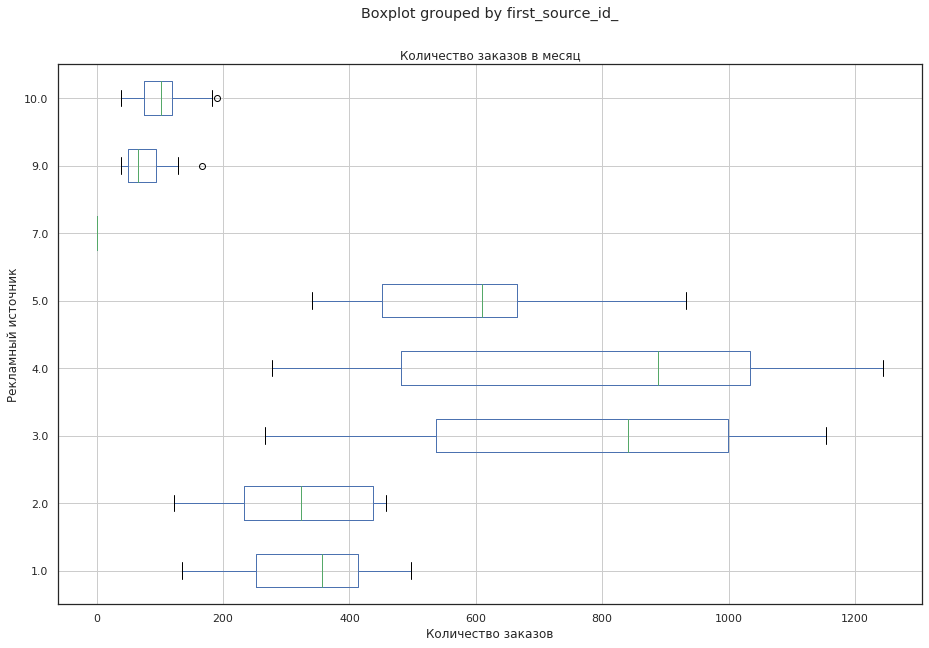

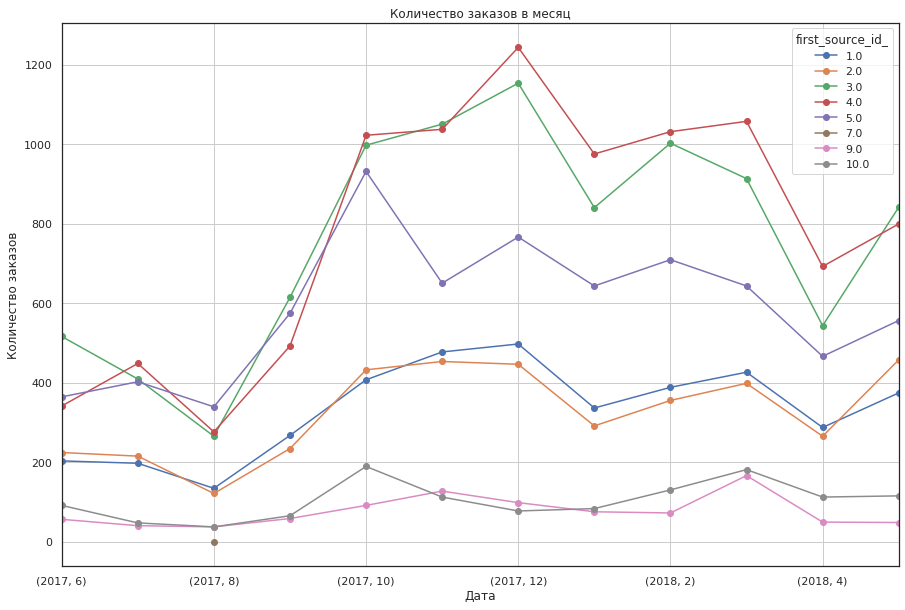

In [75]:
# Построим графики
buy_ts_days_source_month.boxplot('revenue_count', by = 'first_source_id_', vert = False, figsize = (15,10))
plt.title('Количество заказов в месяц')
plt.ylabel('Рекламный источник')
plt.xlabel('Количество заказов')
plt.show()

buy_ts_days_source_month.pivot_table(index = ['buy_ts_year_', 'buy_ts_month_'],
                                    columns = 'first_source_id_',
                                    values = 'revenue_count',
                                    aggfunc = 'first').plot(figsize = (15,10), style = 'o-', grid = True)
plt.title('Количество заказов в месяц')
plt.ylabel('Количество заказов')
plt.xlabel('Дата')
plt.show()

In [76]:
round(buy_ts_days_source_month.groupby('first_source_id_').agg({'revenue_count': 'mean'})).T

first_source_id_,1.0,2.0,3.0,4.0,5.0,7.0,9.0,10.0
revenue_count,334.0,325.0,763.0,785.0,588.0,1.0,77.0,104.0


**Рекламные источники №4: в среднем ~785 заказов в месяц; №3: ~763 заказа в месяц; распределения данных скошены влево. А это значит, что большинство заказов меньше медианного заказа. Значение медианы №4: ~888, №3: ~842. Но у источника №4 правый ус "ящика" длинее: доходит до ~1250, у №3 - правый ус доходит до ~1150.** 
**Выделяется источник №5: в среднем ~588 заказов в месяц.**

**Рекламные источники №1, 2 - в среднем ~325-334 заказа в месяц.**

**Рекламные источники №9: в среднем ~77 заказов в месяц, №10: в среднем ~104.**



*Какой средний чек?*



Значения среднего чека за день и за месяц уже посчитаны выше. Поэтому сразу перейдем к построению графиков. Ну и еще раз выведем полученный результат:

In [77]:
buy_ts_days

,buy_ts_date_,revenue_count,revenue_sum,revenue_mean
0,2017-06-01,96,389.46,4.056875
1,2017-06-02,111,324.11,2.919910
2,2017-06-03,67,166.48,2.484776
3,2017-06-04,66,195.21,2.957727
4,2017-06-05,161,441.49,2.742174
...,...,...,...,...
358,2018-05-27,107,374.19,3.497103
359,2018-05-28,188,740.00,3.936170
360,2018-05-29,189,491.06,2.598201
361,2018-05-30,208,1021.69,4.911971


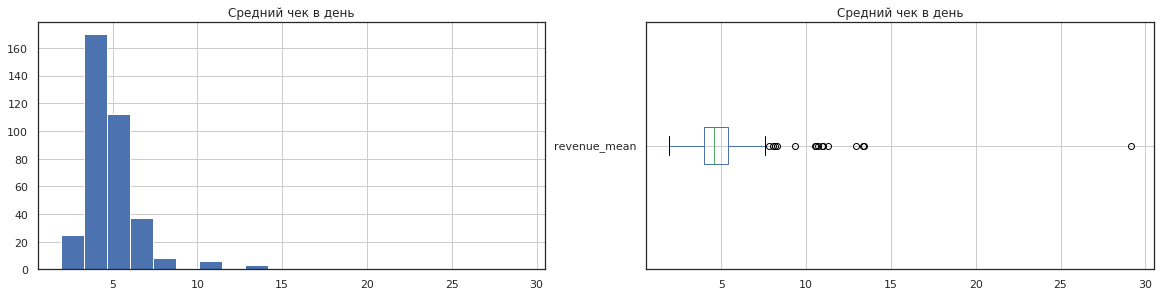

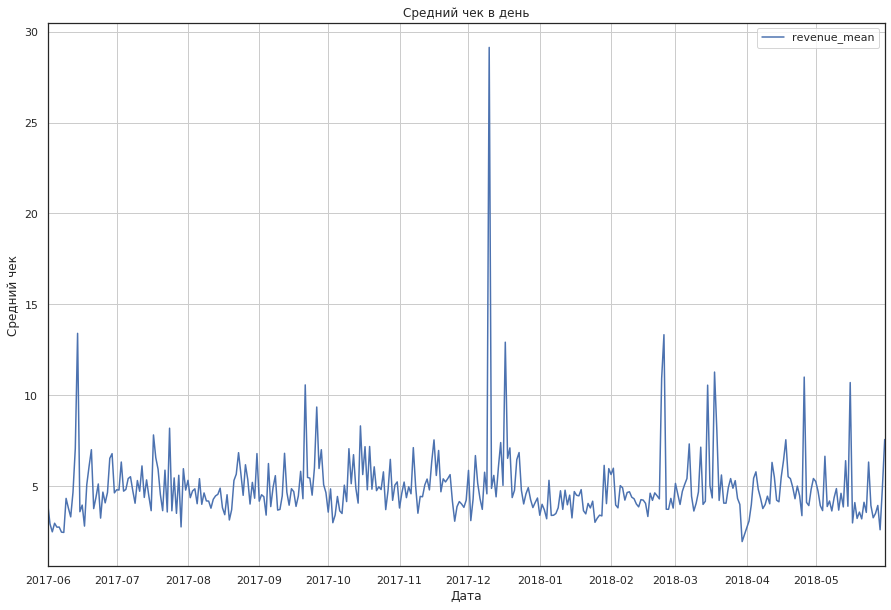

In [78]:
# Построим графики:
plt.figure(figsize = (20,10))
plt.subplot(2,2,1)
buy_ts_days['revenue_mean'].hist(bins = 20)
plt.title('Средний чек в день')
plt.subplot(2,2,2)
buy_ts_days.boxplot('revenue_mean', vert = False)
plt.title('Средний чек в день')
plt.show()
buy_ts_days.pivot_table(index = 'buy_ts_date_',
                                    values = 'revenue_mean',
                                    aggfunc = 'first').plot(figsize = (15,10), grid = True)
plt.title('Средний чек в день')
plt.ylabel('Средний чек')
plt.xlabel('Дата')
plt.show()

In [79]:
buy_ts_days['revenue_mean'].mean()

4.940364407241185

**Средний чек в среднем составляет ~5 в день.**

Посмотрим на распределение данных "Средний чек в месяц":

In [80]:
buy_ts_month

,buy_ts_year_,buy_ts_month_,revenue_count,revenue_sum,revenue_mean
0,2017,6,2354,9557.49,4.060106
1,2017,7,2363,12539.47,5.306589
2,2017,8,1807,8758.78,4.847139
3,2017,9,3387,18345.51,5.416448
4,2017,10,5679,27987.70,4.928280
5,2017,11,5659,27069.93,4.783518
6,2017,12,6218,36388.60,5.852139
7,2018,1,4721,19417.13,4.112927
8,2018,2,5281,25560.54,4.840095
9,2018,3,5326,28834.59,5.413930


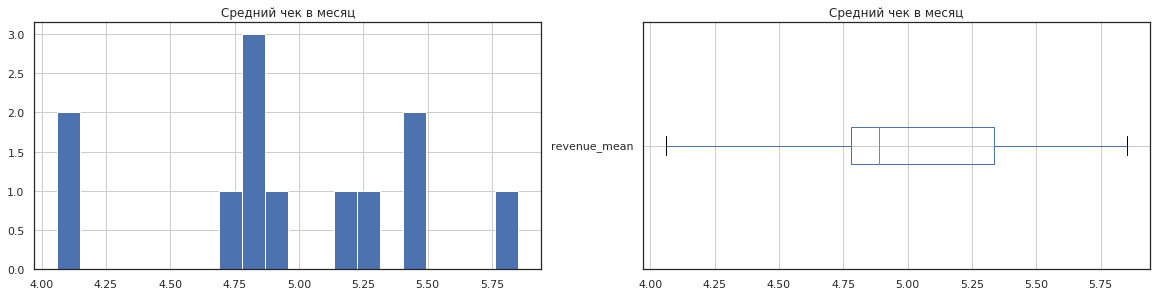

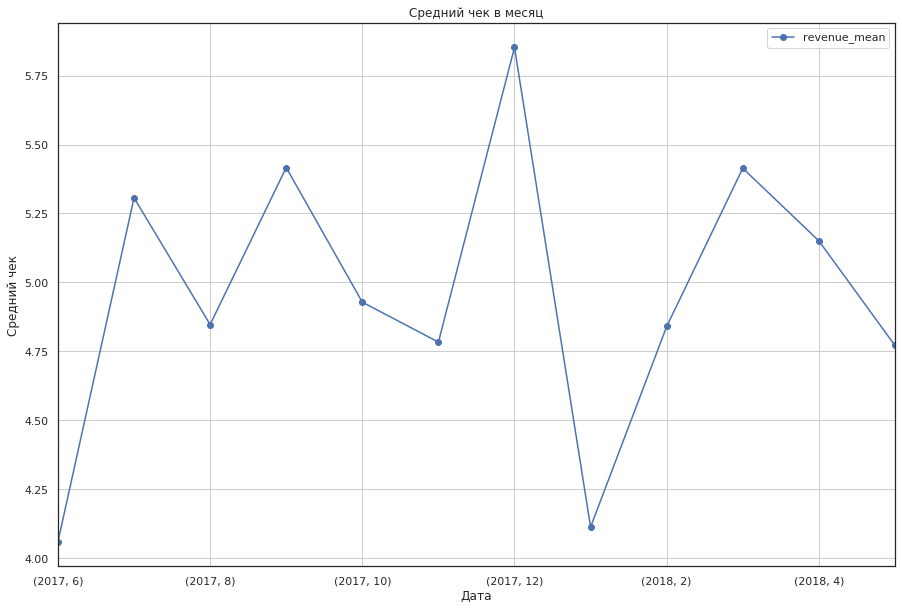

In [81]:
plt.figure(figsize = (20,10))
plt.subplot(2,2,1)
buy_ts_month['revenue_mean'].hist(bins = 20)
plt.title('Средний чек в месяц')

plt.subplot(2,2,2)
buy_ts_month.boxplot('revenue_mean', vert = False)
plt.title('Средний чек в месяц')
plt.show()

buy_ts_month.pivot_table(index = ['buy_ts_year_', 'buy_ts_month_'],
                                    values = 'revenue_mean',
                                    aggfunc = 'first').plot(figsize = (15,10), grid = True, style = 'o-')
plt.title('Средний чек в месяц')
plt.ylabel('Средний чек')
plt.xlabel('Дата')
plt.show()

In [82]:
revenue_mean = buy_ts_month.groupby(['buy_ts_year_', 'buy_ts_month_'])['revenue_mean'].mean().reset_index()
revenue_mean['revenue_mean'] = round(revenue_mean['revenue_mean'])
revenue_mean

,buy_ts_year_,buy_ts_month_,revenue_mean
0,2017,6,4.0
1,2017,7,5.0
2,2017,8,5.0
3,2017,9,5.0
4,2017,10,5.0
5,2017,11,5.0
6,2017,12,6.0
7,2018,1,4.0
8,2018,2,5.0
9,2018,3,5.0


**Средний чек в среднем ~5 в месяц. Повышается только в декабре перед новогодними праздниками и каникулами: ~6. В январе месяце понижается до ~4.**

И нам осталось посмотреть на средний чек, сгруппировав данные по рекламному источнику, из которого первый раз пришел пользователь:

In [83]:
buy_ts_days_source

,first_source_id_,buy_ts_date_,revenue_count,revenue_sum,revenue_mean
0,1.0,2017-06-01,10,148.68,14.868000
1,1.0,2017-06-02,4,10.39,2.597500
2,1.0,2017-06-03,10,19.27,1.927000
3,1.0,2017-06-04,4,7.54,1.885000
4,1.0,2017-06-05,17,31.72,1.865882
...,...,...,...,...,...
2414,10.0,2018-05-27,2,1.47,0.735000
2415,10.0,2018-05-28,8,9.35,1.168750
2416,10.0,2018-05-29,5,5.58,1.116000
2417,10.0,2018-05-30,6,8.67,1.445000


/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


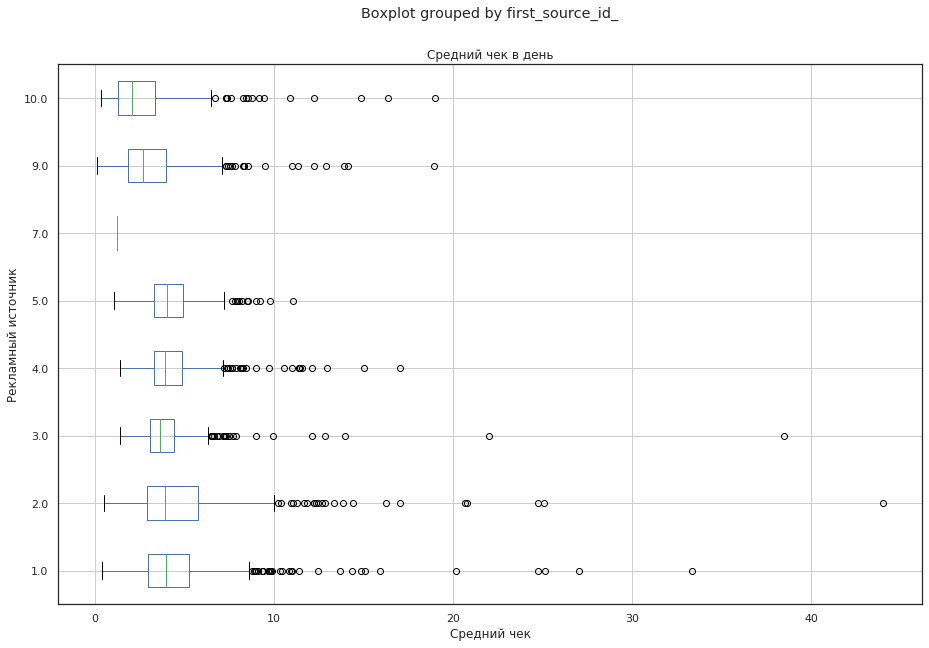

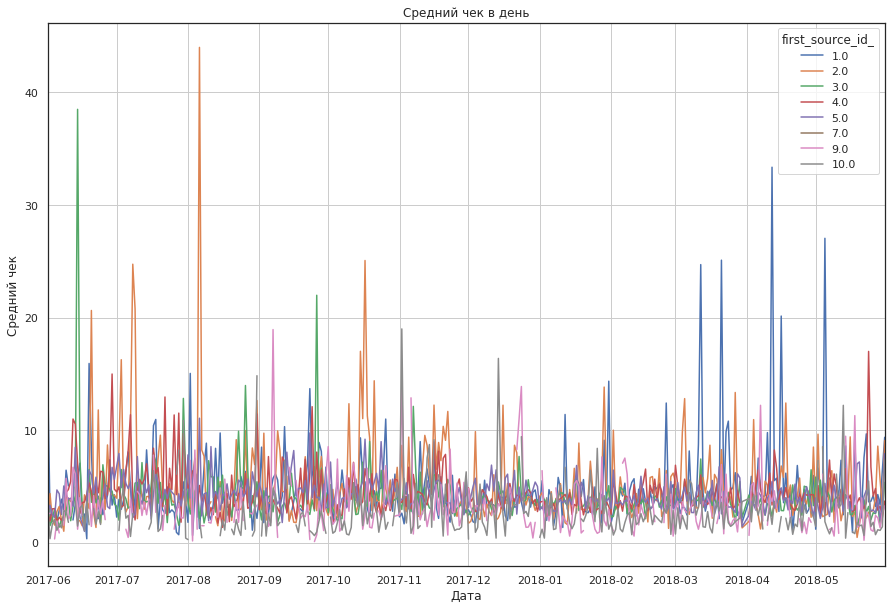

In [84]:
buy_ts_days_source.boxplot('revenue_mean', by = 'first_source_id_', vert = False, figsize = (15,10))
plt.title('Средний чек в день')
plt.xlabel('Средний чек')
plt.ylabel('Рекламный источник')
plt.show()

buy_ts_days_source.pivot_table(index = 'buy_ts_date_',
                                    columns = 'first_source_id_',
                                    values = 'revenue_mean',
                                    aggfunc = 'first').plot(figsize = (15,10), grid = True)
plt.title('Средний чек в день')
plt.ylabel('Средний чек')
plt.xlabel('Дата')
plt.show()

In [85]:
buy_ts_days_source.groupby('first_source_id_')['revenue_mean'].mean().reset_index().T

,0,1,2,3,4,5,6,7
first_source_id_,1.000000,2.000000,3.00000,4.00000,5.000000,7.00,9.000000,10.000000
revenue_mean,4.718879,4.998645,4.02971,4.38187,4.234828,1.22,3.265309,2.712736


**Средний чек выше у  рекламных источников: №1, 2: ~5 в день; у №3, 4, 5: ~4 в день; у №9, 10: ~3. По 7 источнику очень  мало информации. Поэтому не берем его в расчет.**

В месяц:

In [86]:
buy_ts_days_source_month

,first_source_id_,buy_ts_year_,buy_ts_month_,revenue_count,revenue_sum,revenue_mean
0,1.0,2017,6,204,899.25,4.408088
1,1.0,2017,7,198,1163.43,5.875909
2,1.0,2017,8,135,577.64,4.278815
3,1.0,2017,9,268,1455.31,5.430261
4,1.0,2017,10,408,1889.15,4.630270
...,...,...,...,...,...,...
80,10.0,2018,1,84,245.34,2.920714
81,10.0,2018,2,131,300.79,2.296107
82,10.0,2018,3,182,516.13,2.835879
83,10.0,2018,4,113,265.26,2.347434


/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


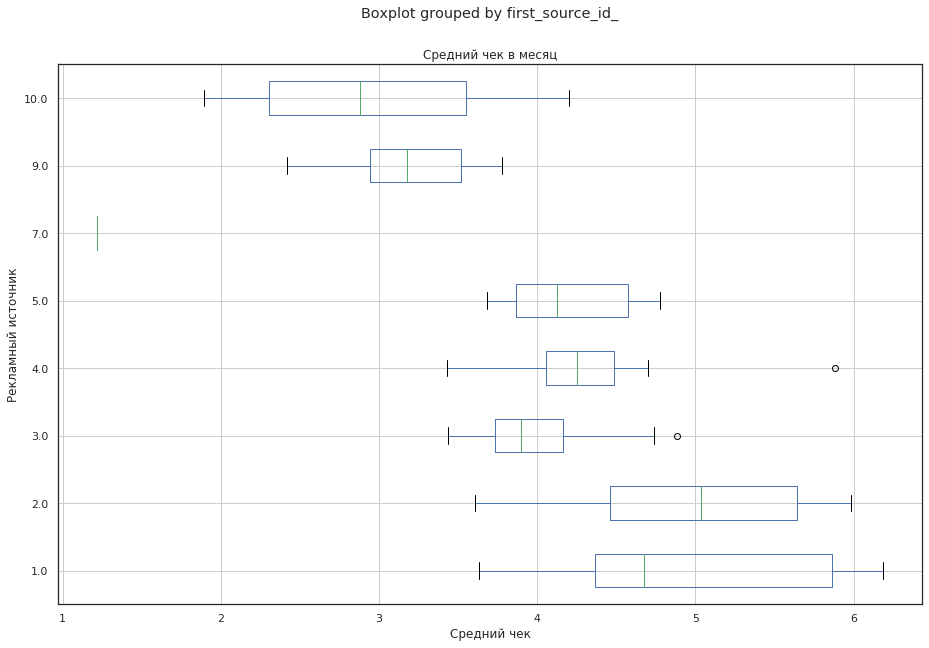

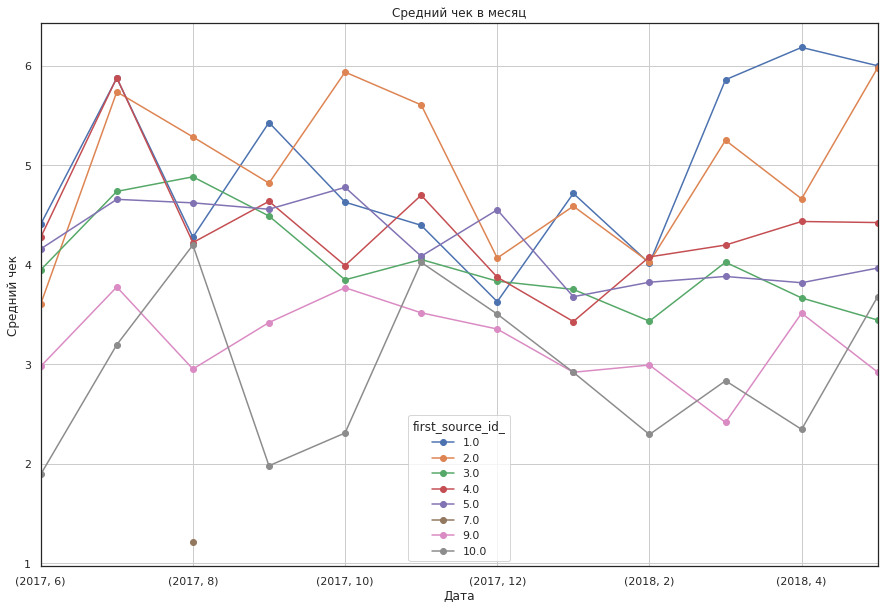

In [87]:

buy_ts_days_source_month.boxplot('revenue_mean', by = 'first_source_id_', vert = False, figsize = (15,10))
plt.title('Средний чек в месяц')
plt.xlabel('Средний чек')
plt.ylabel('Рекламный источник')
plt.show()

buy_ts_days_source_month.pivot_table(index = ['buy_ts_year_', 'buy_ts_month_'],
                                    columns = 'first_source_id_',
                                    values = 'revenue_mean',
                                    aggfunc = 'first').plot(figsize = (15,10), style = 'o-', grid = True)
plt.title('Средний чек в месяц')
plt.ylabel('Средний чек')
plt.xlabel('Дата')
plt.show()

In [88]:
buy_ts_days_source_month.groupby('first_source_id_')['revenue_mean'].mean().reset_index()

,first_source_id_,revenue_mean
0,1.0,4.952453
1,2.0,4.964628
2,3.0,4.010893
3,4.0,4.346596
4,5.0,4.216451
5,7.0,1.220000
6,9.0,3.212170
7,10.0,2.933161


**Средний чек выше у рекламных источников: №1, 2: ~5 в день; у №3, 4, 5: ~4 в месяц; у №9, 10: ~3.**

### Вывод:

**Значения средних чеков совпали в день и месяц. Это говорит о том, что бизнес не сезонный. Стабильный. Средний чек в течение периода с июня 2017 по конец мая 2018:  ~5 в месяц. Повышается в декабре (~6) перед новогодними праздниками. В январе наблюдается понижение до ~4.**



*Сколько денег приносят?*

Чтобы ответить на данный вопрос нужно рассчитать Lifetime Value(LTV) - это прибыль, которую приносит  клиент в среднем со всех своих покупок за всё время работы с ним.

Найдем Lifetime Value(LTV) за месяц: считать будем по когортам. 

Используем формулу: LTV = доход за период / количество клиентов за период

1) найдем дату первой покупки каждого покупателя (таблица orders)

2) вычислим число новых покупателей за месяц

3) посчитаем валовую прибыль (учтем: коэффициент валовой маржинальности = 1. Следовательно валовая прибыль = выручка)

4) рассчитаем по формуле LTV для каждой когорты. Рассмотрим как изменяется LTV в зависимости от времени (lifetime)

Приступим к расчетам:


In [89]:
#orders.head(5)
# Добавим дату первого заказа и создадим таблицу first_orders
first_orders = orders.groupby('uid').agg({'buy_ts': 'min'}).reset_index() # создание таблицы
first_orders.columns = ['uid', 'first_orders_month'] # переименуем названия столбцов
first_orders['first_orders_month'] = first_orders['first_orders_month'].astype('datetime64[M]')
# получили месяц первого заказа каждого покупателя:
first_orders.head(5)

,uid,first_orders_month
0,313578113262317,2018-01-01
1,1575281904278712,2017-06-01
2,2429014661409475,2017-10-01
3,2464366381792757,2018-01-01
4,2551852515556206,2017-11-01


Посчитаем количество новых покупателей n_buyers за каждый месяц:

In [90]:
cohort_sizes = first_orders.groupby('first_orders_month').agg({'uid': 'nunique'}).reset_index()
cohort_sizes.columns = ['first_orders_month', 'n_buyers']
cohort_sizes.head(5)

,first_orders_month,n_buyers
0,2017-06-01,2023
1,2017-07-01,1923
2,2017-08-01,1370
3,2017-09-01,2581
4,2017-10-01,4340


 Построим когорты. Добавим месяц первого заказа каждого покупателя в таблицу с заказами:

In [91]:
orders_new = pd.merge(orders, first_orders, on = 'uid')
orders_new['buy_ts_date'] = orders_new['buy_ts_date'].astype('datetime64[M]')
orders_new.head(5)

,buy_ts,revenue,uid,buy_ts_date,buy_ts_year,buy_ts_month,first_device,first_source_id,first_orders_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017,6,desktop,1.0,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017,6,desktop,2.0,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017,6,desktop,2.0,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017,6,desktop,2.0,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017,6,desktop,3.0,2017-06-01


Сгруппируем таблицу заказов по месяцу первого заказа  и месяцу каждого заказа, сложим выручку:

In [92]:
cohorts = orders_new.groupby(['first_orders_month', 'buy_ts_date']).agg({'revenue': 'sum'}).reset_index()
# Добавим в табл. данные о том, сколько людей первый раз совершили заказ в каждый месяц:
report = pd.merge(cohort_sizes, cohorts, on = 'first_orders_month')
report

,first_orders_month,n_buyers,buy_ts_date,revenue
0,2017-06-01,2023,2017-06-01,9557.49
1,2017-06-01,2023,2017-07-01,981.82
2,2017-06-01,2023,2017-08-01,885.34
3,2017-06-01,2023,2017-09-01,1931.30
4,2017-06-01,2023,2017-10-01,2068.58
...,...,...,...,...
73,2018-03-01,3533,2018-04-01,1063.05
74,2018-03-01,3533,2018-05-01,1114.87
75,2018-04-01,2276,2018-04-01,10600.69
76,2018-04-01,2276,2018-05-01,1209.92



Т.к. LTV - относительный показатель, поэтому его будем смотреть по "возрастным" когортам (в столбцах - не месяц заказа, а возраст когорты)

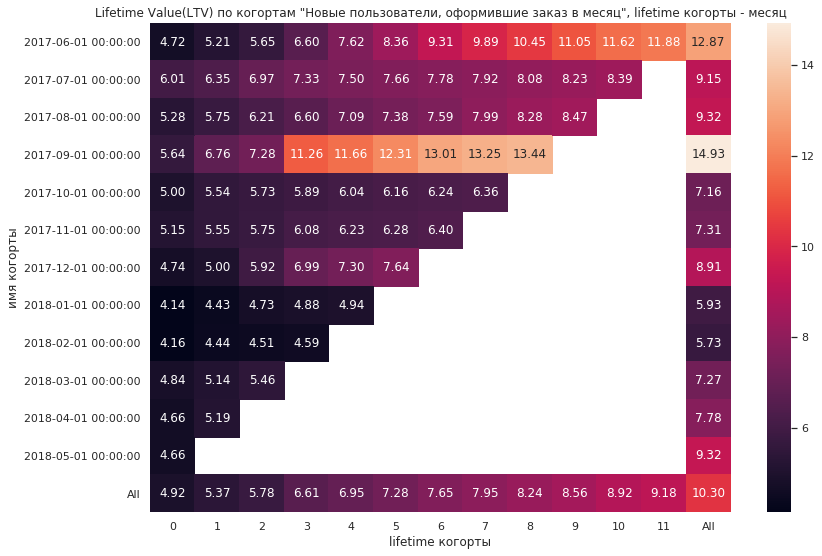

In [93]:
report['age'] = round((report['buy_ts_date'] - report['first_orders_month']) / np.timedelta64(1, 'M')).astype('int')
# Найдем значение LTV:
report['ltv'] = report['revenue'] / report['n_buyers']
# Результат выведем в виде сводной таблицы, 
#где строки: когорта, столбцы: возраст когорты, значение ячеек: среднее арифметическое ltv:
output = report.pivot_table(index = 'first_orders_month',
                           columns = 'age',
                           values = 'ltv',
                           aggfunc = 'mean',
                           margins = True)


# учтем, что ltv - накопительный показатель. Воспользуемся методом cumsum()
# наложим на сводную таблицу тепловую карту:
plt.figure(figsize = (13,9))
sns.heatmap(output.cumsum(axis = 1),annot = True, fmt = '.2f')
plt.title('Lifetime Value(LTV) по когортам "Новые пользователи, оформившие заказ в месяц", lifetime когорты - месяц')
plt.xlabel('lifetime когорты')
plt.ylabel('имя когорты')
plt.show()

**В среднем пользователь приносит со всех своих покупок за 3 месяца "жизни": ~5.78; за 6 месяцев жизни ~7.28; за 12 месяцев жизни: ~ 10.3.**

Рассчитаем Lifetime Value(LTV) для когорт "Первое устройство, с которого была зарегистрирована первая интернет - сессия", lifetime когорты - месяц:

In [94]:
#Удалим из таблицы orders_new информацию по датам ['2018-01-01', '2018-02-01', '2018-03-01', '2018-04-01', '2018-05-01']
list_ = ['2018-01-01', '2018-02-01', '2018-03-01', '2018-04-01', '2018-05-01']
orders_new_1 = orders_new.query('buy_ts_date != @list_').copy()
# Подсчет выручки: сгруппируем orders_new по ['buy_ts_year', 'buy_ts_month', 'first_device']
# Найдем общую сумму revenue:
orders_new_device = orders_new_1.groupby(['buy_ts_year', 'buy_ts_month', 'first_device']).\
                                                   agg({'revenue': 'sum'}).reset_index()
orders_new_device

,buy_ts_year,buy_ts_month,first_device,revenue
0,2017,6,desktop,6093.42
1,2017,6,touch,983.91
2,2017,7,desktop,7092.26
3,2017,7,touch,2079.27
4,2017,8,desktop,4584.38
5,2017,8,touch,952.27
6,2017,9,desktop,8641.88
7,2017,9,touch,1949.07
8,2017,10,desktop,14849.91
9,2017,10,touch,2777.40


In [95]:
# подсчет количества новых покупателей:
users_device = orders_new_1.groupby(['buy_ts_year', 'buy_ts_month', 'first_device']).agg({'uid': 'nunique'}).reset_index()
users_device

,buy_ts_year,buy_ts_month,first_device,uid
0,2017,6,desktop,1336
1,2017,6,touch,264
2,2017,7,desktop,1227
3,2017,7,touch,332
4,2017,8,desktop,904
5,2017,8,touch,186
6,2017,9,desktop,1664
7,2017,9,touch,409
8,2017,10,desktop,2963
9,2017,10,touch,648


In [96]:
# Соединим таблицы orders_new_device и users_device:
orders_new_device = orders_new_device.merge(users_device, on = ['buy_ts_year', 'buy_ts_month', 'first_device'])
# Получение возраста когорт:
orders_new_device['cohorts'] = orders_new_device['buy_ts_month'] - 6
orders_new_device

,buy_ts_year,buy_ts_month,first_device,revenue,uid,cohorts
0,2017,6,desktop,6093.42,1336,0
1,2017,6,touch,983.91,264,0
2,2017,7,desktop,7092.26,1227,1
3,2017,7,touch,2079.27,332,1
4,2017,8,desktop,4584.38,904,2
5,2017,8,touch,952.27,186,2
6,2017,9,desktop,8641.88,1664,3
7,2017,9,touch,1949.07,409,3
8,2017,10,desktop,14849.91,2963,4
9,2017,10,touch,2777.40,648,4


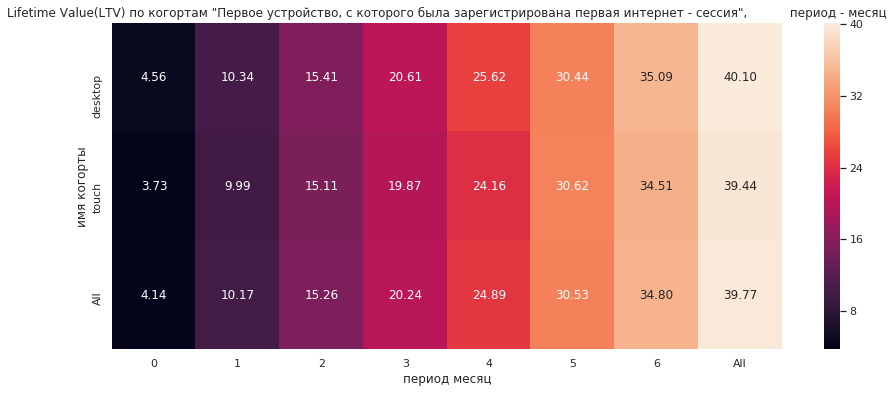

In [97]:
# Найдем ltv:
orders_new_device['ltv'] = orders_new_device['revenue'] / orders_new_device['uid']

# Результат выведем в виде сводной таблицы, 
#где строки: когорта, столбцы: возраст когорты, значение ячеек: среднее арифметическое ltv:
output = orders_new_device.pivot_table(index = 'first_device',
                           columns = 'cohorts',
                           values = 'ltv',
                           aggfunc = 'mean',
                           margins = True)


# учтем, что ltv - накопительный показатель. Воспользуемся методом cumsum()
# наложим на сводную таблицу тепловую карту:
plt.figure(figsize = (15,6))
sns.heatmap(output.cumsum(axis = 1).round(2), annot = True, fmt = '.2f')
plt.title('Lifetime Value(LTV) по когортам "Первое устройство, с которого была зарегистрирована первая интернет - сессия", \
          период - месяц')
plt.xlabel('период месяц')
plt.ylabel('имя когорты')
plt.show()

**В среднем пользователь приносит со всех своих покупок за 3 месяца жизни из когорт "первое устройство, с которого была зарегистрирована первая интернет-сессия": touch и desktop ~ одинаковую выручку: 15,26. За 6 месяцев жизни: ~34.8**


Рассчитаем Lifetime Value(LTV) для когорт "Первый рекламный источник, из которого пришел покупатель", lifetime когорты - месяц:

In [98]:
# Подсчет выручки: сгруппируем orders_new по ['buy_ts_year', 'buy_ts_month', 'first_device']
# Найдем общую сумму revenue:
orders_new_first_source_id = orders_new_1.groupby(['buy_ts_year', 'buy_ts_month', 'first_source_id']).\
                                                   agg({'revenue': 'sum'}).reset_index()
orders_new_first_source_id.head(5)

,buy_ts_year,buy_ts_month,first_source_id,revenue
0,2017,6,1.0,899.25
1,2017,6,2.0,811.35
2,2017,6,3.0,2041.74
3,2017,6,4.0,1462.38
4,2017,6,5.0,1518.40


In [99]:
# подсчет количества новых покупателей:
users_source_id = orders_new_1.groupby(['buy_ts_year', 'buy_ts_month', 'first_source_id']).\
                  agg({'uid': 'nunique'}).reset_index()
users_source_id.head(5)

,buy_ts_year,buy_ts_month,first_source_id,uid
0,2017,6,1.0,170
1,2017,6,2.0,189
2,2017,6,3.0,480
3,2017,6,4.0,317
4,2017,6,5.0,315


In [100]:
# Соединим таблицы orders_new_first_source_id и users_source_id:
orders_new_first_source_id = orders_new_first_source_id.merge \
                            (users_source_id, on = ['buy_ts_year', 'buy_ts_month', 'first_source_id'])
orders_new_first_source_id['cohorts'] = orders_new_first_source_id['buy_ts_month'] - 6
orders_new_first_source_id.head(5)

,buy_ts_year,buy_ts_month,first_source_id,revenue,uid,cohorts
0,2017,6,1.0,899.25,170,0
1,2017,6,2.0,811.35,189,0
2,2017,6,3.0,2041.74,480,0
3,2017,6,4.0,1462.38,317,0
4,2017,6,5.0,1518.40,315,0


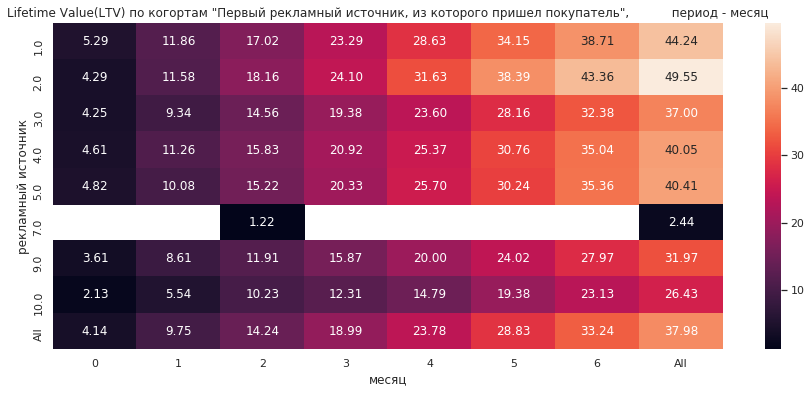

In [101]:
# Найдем ltv:
orders_new_first_source_id['ltv'] = orders_new_first_source_id['revenue'] / orders_new_first_source_id['uid']

# Результат выведем в виде сводной таблицы, 
#где строки: когорта, столбцы: возраст когорты, значение ячеек: среднее арифметическое ltv:
output = orders_new_first_source_id.pivot_table(index = 'first_source_id',
                           columns = 'cohorts',
                           values = 'ltv',
                           aggfunc = 'mean',
                           margins = True)


# учтем, что ltv - накопительный показатель. Воспользуемся методом cumsum()
# наложим на сводную таблицу тепловую карту:
plt.figure(figsize = (15,6))
sns.heatmap(output.cumsum(axis = 1).round(2), annot = True, fmt = '.2f')
plt.title('Lifetime Value(LTV) по когортам "Первый рекламный источник, из которого пришел покупатель", \
          период - месяц')
plt.xlabel('месяц')
plt.ylabel('рекламный источник')
plt.show()

**В итоге: в среднем больше всех выручки приносит пользователь, пришедший из рекламного источника №2, 1 за 6 месяцев жизни: ~50 и ~44 соответственно. Меньше всех за 6 месяцев жизни приносит пользователь, пришедший из рекламного источника №10: ~26**



*Сколько денег потратили? Всего / на каждый источник / по времени*

Обратимся к таблице costs (информация о затратах на маркетинг):

In [102]:
costs

,source_id,dt,costs,date_cost_marketing
0,1,2017-06-01,75.20,2017-06-01
1,1,2017-06-02,62.25,2017-06-02
2,1,2017-06-03,36.53,2017-06-03
3,1,2017-06-04,55.00,2017-06-04
4,1,2017-06-05,57.08,2017-06-05
...,...,...,...,...
2537,10,2018-05-27,9.92,2018-05-27
2538,10,2018-05-28,21.26,2018-05-28
2539,10,2018-05-29,11.32,2018-05-29
2540,10,2018-05-30,33.15,2018-05-30


Посмотрим сколько было потрачено денег на каждый рекламный источник:

In [103]:
# Создадим сводную таблицу:
costs.pivot_table(index = 'source_id',
                 values = 'costs',
                 aggfunc = 'sum',
                 margins = True).T

source_id,1,2,3,4,5,9,10,All
costs,20833.27,42806.04,141321.63,61073.6,51757.1,5517.49,5822.49,329131.62


**Всего за период с июня 2017 по конец мая 2018 года на маркетинг было потрачено 329131.62. Больше всех было потрачено на рекламнный источник №3: затраты составили 141321.63. Меньше всех на рекламный источник №1: затраты составили 20833.27. Для 7 рекламного источника сумма затрат неизвестна.**

Построим график "Изменение сумм затрат по месяцам":

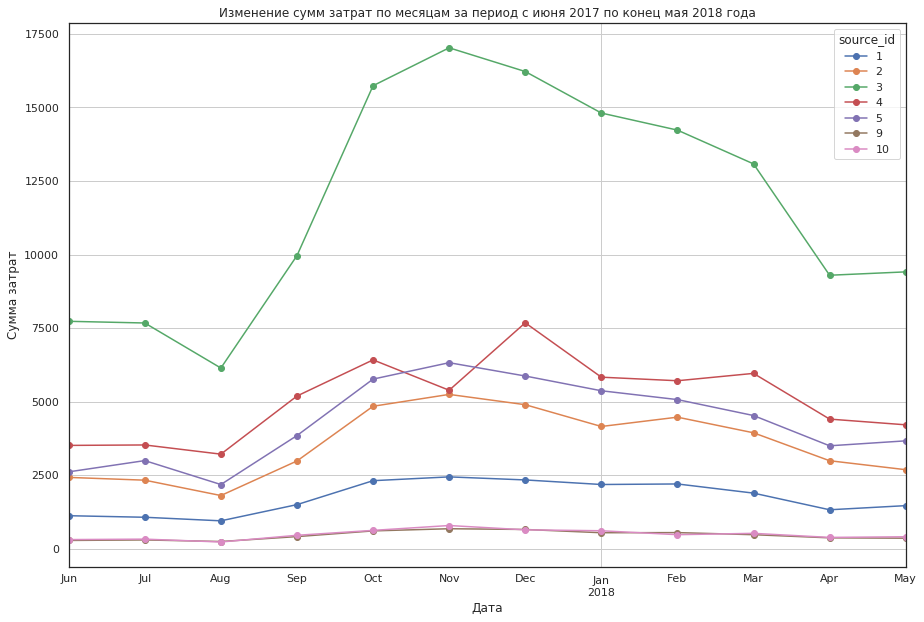

In [104]:
#Выделим месяц:
costs['buy_ts_date'] = (costs['date_cost_marketing'].dt.date).astype('datetime64[M]')
# Построим график:
costs.pivot_table(index = 'buy_ts_date',
                  columns = 'source_id',
                 values = 'costs',
                 aggfunc = 'sum').plot(figsize = (15,10), style = 'o-', grid = True)
plt.title('Изменение сумм затрат по месяцам за период с июня 2017 по конец мая 2018 года')
plt.xlabel('Дата')
plt.ylabel('Сумма затрат')
plt.show()

**На графике выделяется рекламный источник №3: с августа наблюдается резкое возрастание затрат. С ноября месяца затраты начинают уменьшаться от месяца к месяцу. У остальных рекламных источников нет резких скачков на графике: затраты приблизительно от месяца к месяцу находятся  в одном диапазоне.**



*Сколько стоило привлечение одного покупателя из каждого источника?*

Найдем Cost of customer acquisition (CAC) - сумма, которая была потрачена на привлечение одного покупателя.

Используем формулу: CAC = (сумма расходов за период) / (количество привлеченных клиентов за период).

Установим период в 1 месяц.

Найдем сумму расходов за период для каждого рекламного источника. Обратимся к данным таблицы costs (информация о затратах на маркетинг):

In [105]:
costs_summa = costs.groupby(['buy_ts_date', 'source_id']).agg({'costs': 'sum'}).reset_index()
costs_summa

,buy_ts_date,source_id,costs
0,2017-06-01,1,1125.61
1,2017-06-01,2,2427.38
2,2017-06-01,3,7731.65
3,2017-06-01,4,3514.80
4,2017-06-01,5,2616.12
...,...,...,...
79,2018-05-01,3,9411.42
80,2018-05-01,4,4214.21
81,2018-05-01,5,3669.56
82,2018-05-01,9,362.17


Найдем количество привлеченных клиентов за период для каждого рекламного источника. Обратимся к данным таблицы visits:

In [106]:
costs_users = visits.groupby(['visits_date', 'first_source_id']).agg({'uid': 'nunique'}).reset_index()
# Переименуем названия столбцов:
costs_users = costs_users.rename(columns = {'visits_date': 'buy_ts_date', 'first_source_id': 'source_id'})
costs_users

,buy_ts_date,source_id,uid
0,2017-06-01,1,566
1,2017-06-01,2,933
2,2017-06-01,3,3291
3,2017-06-01,4,2828
4,2017-06-01,5,2421
...,...,...,...
93,2018-05-01,4,5817
94,2018-05-01,5,3311
95,2018-05-01,7,2
96,2018-05-01,9,406


Соединим таблицы costs_summa и costs_users:

In [107]:
costs_summa = costs_summa.merge(costs_users, on = ['buy_ts_date', 'source_id'], how = 'right')
costs_summa

,buy_ts_date,source_id,costs,uid
0,2017-06-01,1,1125.61,566
1,2017-06-01,2,2427.38,933
2,2017-06-01,3,7731.65,3291
3,2017-06-01,4,3514.80,2828
4,2017-06-01,5,2616.12,2421
...,...,...,...,...
93,2018-01-01,7,NaN,5
94,2018-02-01,7,NaN,3
95,2018-03-01,7,NaN,1
96,2018-04-01,7,NaN,1


В полученной таблице есть пропущенные значения. Выведем данные строки на экран:

In [108]:
costs_summa[costs_summa['costs'].isna()]

,buy_ts_date,source_id,costs,uid
84,2017-06-01,7,NaN,2
85,2017-07-01,6,NaN,1
86,2017-07-01,7,NaN,2
87,2017-08-01,7,NaN,1
88,2017-09-01,7,NaN,2
89,2017-10-01,7,NaN,5
90,2017-11-01,7,NaN,1
91,2017-12-01,6,NaN,1
92,2017-12-01,7,NaN,9
93,2018-01-01,7,NaN,5


У нас нет информации по затратам на 6 и 7 рекламный источник - заменим пропущенные значение на 0:

In [109]:
# Заменим пропуски на 0 с помощью метода fillna():
costs_summa['costs'] = costs_summa['costs'].fillna(0)
# Проверим результат - отобразим на экран строки с пропусками
costs_summa[costs_summa['costs'].isna()]

,buy_ts_date,source_id,costs,uid


В результате пропущенные значения заменены корректно. 

Вычислим CAC: разделим сумму затрат за месяц для каждого рекламного источника на количество привлеченных пользователей за этот же период:

In [110]:
# Значения CAC сохраним в отдельном столбце:
pd.options.display.float_format = '{:.2f}'.format # зададим формат для вещественных чисел: 2 знака после запятой
costs_summa['cac'] = costs_summa['costs'] / costs_summa['uid']
costs_summa # Проверим результат

,buy_ts_date,source_id,costs,uid,cac
0,2017-06-01,1,1125.61,566,1.99
1,2017-06-01,2,2427.38,933,2.60
2,2017-06-01,3,7731.65,3291,2.35
3,2017-06-01,4,3514.80,2828,1.24
4,2017-06-01,5,2616.12,2421,1.08
...,...,...,...,...,...
93,2018-01-01,7,0.00,5,0.00
94,2018-02-01,7,0.00,3,0.00
95,2018-03-01,7,0.00,1,0.00
96,2018-04-01,7,0.00,1,0.00


Cost of customer acquisition (CAC) вычислен. 

Построим графики:

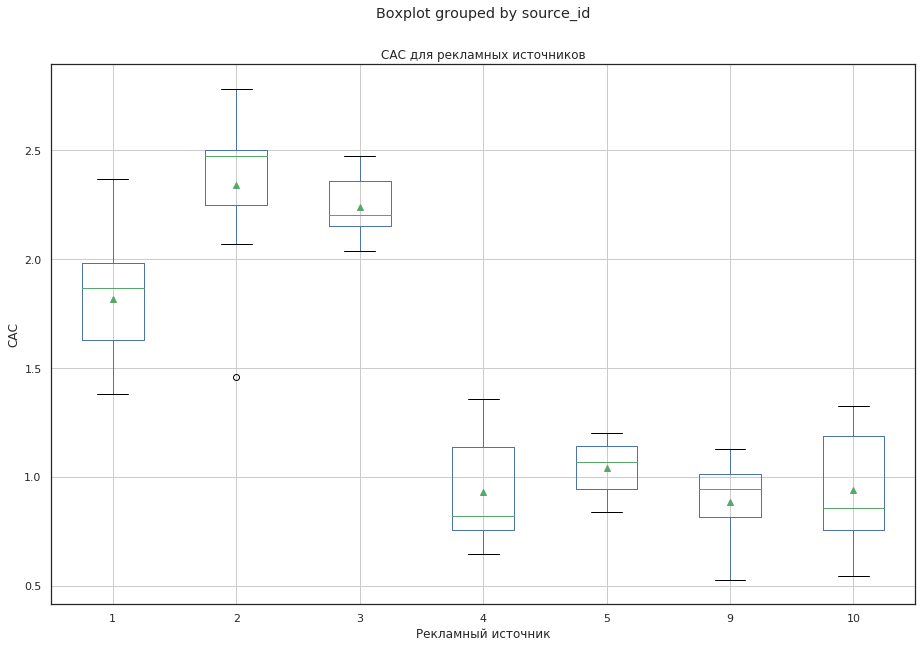

In [111]:
costs_list = ['1', '2', '3', '4', '5', '9', '10']
costs_summa.query('source_id.isin(@costs_list)').boxplot('cac', by = 'source_id', figsize = (15,10), showmeans = True)
plt.title("CAC для рекламных источников")
plt.xlabel('Рекламный источник')
plt.ylabel('CAC')
plt.show()

Выведем таблицу "Привлечение одного пользователя для каждого рекламного источника, из которого он пришел":

In [112]:
# Найдем среднее арифметическое:
costs_mean = costs_summa.groupby(['source_id']).agg({'cac': 'mean'}).reset_index()
costs_mean.T 

,0,1,2,3,4,5,6,7,8
source_id,1.00,2.00,3.00,4.00,5.00,6.00,7.00,9.00,10.00
cac,1.81,2.34,2.24,0.93,1.04,0.00,0.00,0.89,0.94


**Меньше всех потратили на привлечение одного пользователя, пришедшего из рекламного источника №4, 9 и 10. Больше всех стоило привлечь одного пользователя, пришедшего из рекламного источника : №2 и 3.**

Сейчас посчитаем CAC для когорт "Первый месяц заказа", определим период в 1 месяц. 

Найдем сумму расходов за каждый месяц:

In [113]:
costs_sum = costs.groupby('buy_ts_date').agg({'costs': 'sum'}).reset_index()
# переименуем название столбца
costs_sum = costs_sum.rename(columns = ({'buy_ts_date': 'first_orders_month'}))
costs_sum

,first_orders_month,costs
0,2017-06-01,18015.00
1,2017-07-01,18240.59
2,2017-08-01,14790.54
3,2017-09-01,24368.91
4,2017-10-01,36322.88
5,2017-11-01,37907.88
6,2017-12-01,38315.35
7,2018-01-01,33518.52
8,2018-02-01,32723.03
9,2018-03-01,30415.27


Найдем количество привлеченных клиентов в когортах "Первый месяц заказа": 

In [114]:
orders_count = orders_new.groupby('first_orders_month').agg({'uid': 'nunique'}).reset_index()
orders_count

,first_orders_month,uid
0,2017-06-01,2023
1,2017-07-01,1923
2,2017-08-01,1370
3,2017-09-01,2581
4,2017-10-01,4340
5,2017-11-01,4081
6,2017-12-01,4383
7,2018-01-01,3373
8,2018-02-01,3651
9,2018-03-01,3533


Объединим таблицы и вычислим CAC:

In [115]:
# Объединим costs_sum и orders_count:
orders_cac = pd.merge(costs_sum, orders_count, on = 'first_orders_month')
orders_cac['cac'] = orders_cac['costs'] / orders_cac['uid']
orders_cac

,first_orders_month,costs,uid,cac
0,2017-06-01,18015.00,2023,8.91
1,2017-07-01,18240.59,1923,9.49
2,2017-08-01,14790.54,1370,10.80
3,2017-09-01,24368.91,2581,9.44
4,2017-10-01,36322.88,4340,8.37
5,2017-11-01,37907.88,4081,9.29
6,2017-12-01,38315.35,4383,8.74
7,2018-01-01,33518.52,3373,9.94
8,2018-02-01,32723.03,3651,8.96
9,2018-03-01,30415.27,3533,8.61


**Из таблицы видно, что дороже всех стоило привлечь одного пользователя из когорты августа месяца. На привлечение одного пользователя в оставшихся когортах тратили примерно одинаковую сумму**

Сейчас проверим на сколько окупились расходы для кагорт "Первый месяц заказа". 

Нужно вычислить ROMI = (LTV) / (CAC). 

Обратимся к результатам таблиц report (посчитан LTV для каждой кагорты) и orders_cac (посчитан CAC для каждой кагорты). Оставим в таблице orders_cac только столбцы first_orders_month (месяц первого заказа) и cac:

In [116]:
orders_cac = orders_cac.loc[:, ['first_orders_month', 'cac']]
orders_cac

,first_orders_month,cac
0,2017-06-01,8.91
1,2017-07-01,9.49
2,2017-08-01,10.80
3,2017-09-01,9.44
4,2017-10-01,8.37
5,2017-11-01,9.29
6,2017-12-01,8.74
7,2018-01-01,9.94
8,2018-02-01,8.96
9,2018-03-01,8.61


Объединим таблицы report и orders_cac:

In [117]:
report = report.merge(orders_cac, on = 'first_orders_month')
report

,first_orders_month,n_buyers,buy_ts_date,revenue,age,ltv,cac
0,2017-06-01,2023,2017-06-01,9557.49,0,4.72,8.91
1,2017-06-01,2023,2017-07-01,981.82,1,0.49,8.91
2,2017-06-01,2023,2017-08-01,885.34,2,0.44,8.91
3,2017-06-01,2023,2017-09-01,1931.30,3,0.95,8.91
4,2017-06-01,2023,2017-10-01,2068.58,4,1.02,8.91
...,...,...,...,...,...,...,...
73,2018-03-01,3533,2018-04-01,1063.05,1,0.30,8.61
74,2018-03-01,3533,2018-05-01,1114.87,2,0.32,8.61
75,2018-04-01,2276,2018-04-01,10600.69,0,4.66,9.79
76,2018-04-01,2276,2018-05-01,1209.92,1,0.53,9.79


Вычислим ROMI = (LTV) / (CAC):

In [118]:
# Добавим в таблицу report новый столбец с расчетами:
report['romi'] = report['ltv'] / report['cac']
report

,first_orders_month,n_buyers,buy_ts_date,revenue,age,ltv,cac,romi
0,2017-06-01,2023,2017-06-01,9557.49,0,4.72,8.91,0.53
1,2017-06-01,2023,2017-07-01,981.82,1,0.49,8.91,0.05
2,2017-06-01,2023,2017-08-01,885.34,2,0.44,8.91,0.05
3,2017-06-01,2023,2017-09-01,1931.30,3,0.95,8.91,0.11
4,2017-06-01,2023,2017-10-01,2068.58,4,1.02,8.91,0.11
...,...,...,...,...,...,...,...,...
73,2018-03-01,3533,2018-04-01,1063.05,1,0.30,8.61,0.03
74,2018-03-01,3533,2018-05-01,1114.87,2,0.32,8.61,0.04
75,2018-04-01,2276,2018-04-01,10600.69,0,4.66,9.79,0.48
76,2018-04-01,2276,2018-05-01,1209.92,1,0.53,9.79,0.05


Создадим сводную таблицу:

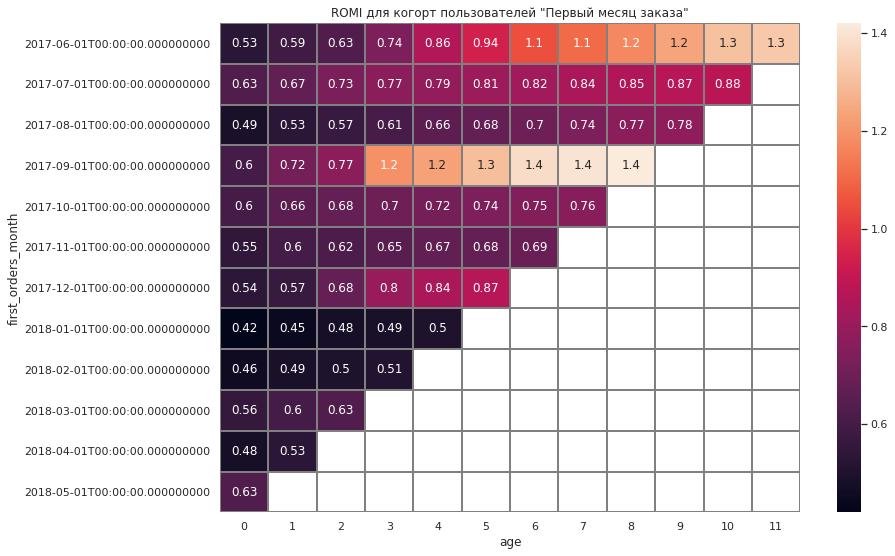

In [119]:
report_result = report.pivot_table(index = 'first_orders_month',
                                  columns = 'age',
                                  values = 'romi',
                                  aggfunc = 'mean')


plt.figure(figsize = (13, 9))
plt.title('ROMI для когорт пользователей "Первый месяц заказа"')
sns.heatmap(report_result.cumsum(axis = 1).round(2), annot = True, linewidths = 1, linecolor = 'grey')
plt.show()

**Из таблицы видим, что июньская когорта окупилась в среднем на ~5,6 месяц жизни. Сентябрьская когорта окупилась на 3 месяц жизни. А  вот, например, июльская когорта не окупилась и к 10 месяцу жизни.**

Выясним как быстро когорты окупаются:

In [120]:
report_result.cumsum(axis = 1).mean(axis = 0)

age
0    0.54
1    0.58
2    0.63
3    0.72
4    0.78
5    0.86
6    0.90
7    0.97
8    1.05
9    0.96
10   1.09
11   1.33
dtype: float64

**Получается когорты по первому месяцу заказа окупаются ~6-8 месяцу жизни.**

Сейчас найдем ROMI для кагорт по первому рекламному источнику, из которого пришел пользователь. 

Обратимся к таблице orders_new_first_source_id(в ней уже вычислен ltv):

In [121]:
orders_new_first_source_id.head(5)

,buy_ts_year,buy_ts_month,first_source_id,revenue,uid,cohorts,ltv
0,2017,6,1.00,899.25,170,0,5.29
1,2017,6,2.00,811.35,189,0,4.29
2,2017,6,3.00,2041.74,480,0,4.25
3,2017,6,4.00,1462.38,317,0,4.61
4,2017,6,5.00,1518.40,315,0,4.82


Обратимся к таблице costs_mean: в ней уже найден сас:

In [122]:
costs_mean = costs_mean.rename(columns = ({'source_id': 'first_source_id'}))
costs_mean


,first_source_id,cac
0,1,1.81
1,2,2.34
2,3,2.24
3,4,0.93
4,5,1.04
5,6,0.00
6,7,0.00
7,9,0.89
8,10,0.94


Объединим таблицы orders_new_first_source_id и costs_mean:

In [123]:
orders_new_first_source_id = orders_new_first_source_id.merge(costs_mean, on = 'first_source_id' )

orders_new_first_source_id.head(5)

,buy_ts_year,buy_ts_month,first_source_id,revenue,uid,cohorts,ltv,cac
0,2017,6,1.00,899.25,170,0,5.29,1.81
1,2017,7,1.00,1163.43,177,1,6.57,1.81
2,2017,8,1.00,577.64,112,2,5.16,1.81
3,2017,9,1.00,1455.31,232,3,6.27,1.81
4,2017,10,1.00,1889.15,354,4,5.34,1.81


Вычислим ROMI и возраст когорт:

In [124]:
orders_new_first_source_id['romi'] = orders_new_first_source_id['ltv'] / orders_new_first_source_id['cac']
orders_new_first_source_id['age'] = orders_new_first_source_id['buy_ts_month'] - 6
orders_new_first_source_id.head(5)

,buy_ts_year,buy_ts_month,first_source_id,revenue,uid,cohorts,ltv,cac,romi,age
0,2017,6,1.00,899.25,170,0,5.29,1.81,2.91,0
1,2017,7,1.00,1163.43,177,1,6.57,1.81,3.62,1
2,2017,8,1.00,577.64,112,2,5.16,1.81,2.84,2
3,2017,9,1.00,1455.31,232,3,6.27,1.81,3.46,3
4,2017,10,1.00,1889.15,354,4,5.34,1.81,2.94,4


Создадим сводную таблицу:

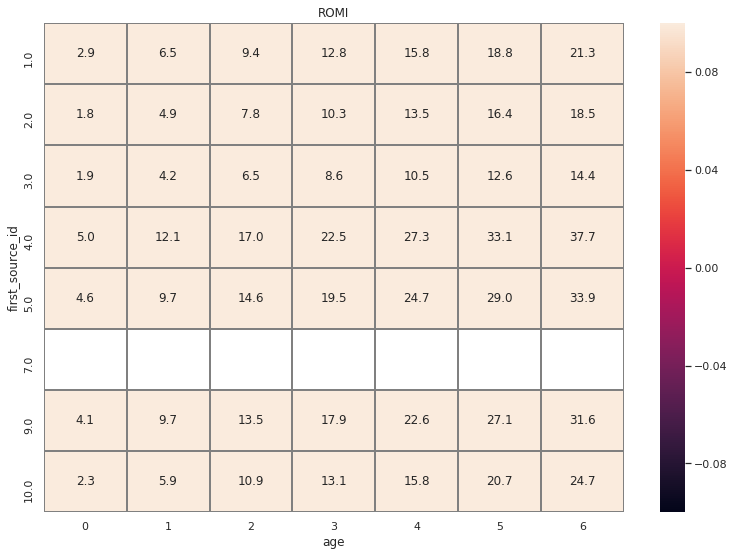

In [125]:
orders_new_first_source_id_pivot = orders_new_first_source_id.pivot_table(index = 'first_source_id',
                                                                         columns = 'age',
                                                                         values = 'romi',
                                                                         aggfunc = 'mean')

plt.figure(figsize = (13,9))
plt.title("ROMI")
sns.heatmap(orders_new_first_source_id_pivot.cumsum(axis = 1), annot = True, fmt = '.1f',
           linewidths = 1, linecolor = 'gray')
orders_new_first_source_id_pivot.cumsum(axis = 1)
plt.show()

**В результате получили следующее: все когорты окупились на 0-lifetime. Выручка, которую принес один пользователь, пришедший из рекламного источника №4 превышает расходы, которые были потрачены на его привлечение в 5 раз. Пришедшего из рекламного источника №5 в 4,6 раз; №9 - в 4,1. Далее, ROMI у рекламного источника №1 = 2,9, у №2,3, 10: ~2**

# Вывод:

В ходе исследования было выяснено, что все рекламные источники окупаются на 0-ой месяц жизни. 

Из всех выделяется источник №4: 

Во-первых, среднее количество, пришедших через этот канал пользователей превышает среднее количество, пришедших через другой канал. 

Во-вторых, низкий CAC(стоимость привлечения одного клиента): ~0,93 (самый низкий). 

В-третьих, ROMI (коэффициент окупаемости) ~5. 

В-четвертых, количество заказов в среднем в месяц составляет ~785(больше чем у остальных).

В-пятых, средний чек ~4. 

Нужно больше вкладывать в рекламные кампании, чтобы больше привлекать новых пользователей. В частности, в рекламный источник №4.



По платформам: важны как desktop, так и touch. Потому что LTV приблизительно одинаковый на протяжении 6 месяцев жизни когорт "Первое устройство, с которого была зарегистрирована первая интернет - сессия". А это значит, что пользователи, чтобы выполнить заказ используют как desktop, так и touch.


<font color='blue'>  </font>